*This is a companion jupyter notebook for the publication "The Effect of Impurities in Post-Consumer Plastic Waste on the Cracking of Polyolefins with Zeolite-based Catalysts" (preprint posted to ChemRxiv under doi.org/10.26434/chemrxiv-2024-4fq4v.) It provides an executable version of the manuscript, generating all figures and analyses from raw experimental data.*
# Companion Notebook for: The Effect of Impurities in Post-Consumer Plastic Waste on the Cracking of Polyolefins with Zeolite-based Catalysts
 Sebastian Rejman, Nasrin Faroughi, Ina Vollmer,* and Bert M. Weckhuysen*

Inorganic Chemistry and Catalysis, Institute for Sustainable and Circular Chemistry, Department of Chemistry, Utrecht University, Universiteitsweg 99, 3584 CG Utrecht, The Netherlands.


## Installing of modules and downloading data (Google colab only. Comment the following cells out if running locally)

In [ ]:
# #Cloning and installing dependencies
# !git clone https://github.com/MyonicS/Manuscript_Impurities_2025
# %cd Manuscript_Impurities_2025
# !pip install -r requirements.txt &>> output.txt

In [ ]:
# import datahugger
# datahugger.get("10.17605/OSF.IO/5WTZY", "data_dh",unzip=False)
# !unzip data_dh/data.zip -d data &>> output_unzipping.log

This notebook is set up to run in google colab. If you intend to run this notebook on your own machine, check the readme file instructions.
We first get the required code and install the necessary modules. If the kernel crashes, restart from the cell below.

### Importing of packages

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt, ticker as mticker
import pyTGA as tga
import numpy as np
import utils.general as utils
import glob
utils.set_plot_params()

In [ ]:
data_dir = 'data'
#Creating output directories if not present
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
if not os.path.exists('Figures'):
    os.makedirs('Figures')
if not os.path.exists('Figures_SI'):
    os.makedirs('Figures_SI')
if not os.path.exists('Results'):
    os.makedirs('Results')

resultdir = 'Results'
figdir = 'Figures'
figdir_SI = 'Figures_SI'

## Abstract
Impurities present in post-consumer plastic waste (PCPW) are a major limiting factor for the catalytic conversion of polyolefin waste into useful chemicals. While the detrimental effect of common impurities present in crude oil, like sulfur and nitrogen as well as metals and their complexes, have been studied extensively, the same cannot be said yet for impurities in PCPW. In this work, we systematically study the effects of a variety of these impurities during catalytic cracking of polyolefins using ultrastable zeolite Y (US-Y) as catalyst. We have prepared model contaminated polymer materials with controlled concentration of individual impurities and tested their impact on the catalyst activity by repeated thermogravimetric analysis with progressively more contaminated catalyst material. Our findings indicate that the most critical impurities are typical zeolite poisons, e.g., alkali metal and earth-alkali metal ions. Na, K, Ca, Mg and Cu led to noticeable zeolite deactivation at 0.14 wt% loading on pristine polymer. Inert metal oxides, such as SiO<sub>2</sub> and TiO<sub>2</sub> only cause deactivation at high loadings (~1 wt%) by blocking access to the zeolite surface. By contrast, cracking of S and Cl contaminated polymer did not lead to deactivation. In addition, examination of the effect of real, mixed PCPW revealed that zeolite US-Y still retains considerable activity even after processing 60 times its weight in PCPW. Metal and metal oxide impurities largely remain on the zeolite material, highlighting the potential of catalytic cracking yielding cleaner pyrolysis oil compared with thermal pyrolysis.

## Introduction
### Chemical Recycling and the Challenge of Impurities
Judging solely by weight, polyolefin plastics are one of the largest product categories of the chemical industry.<sup>1</sup> For this reason, the millions of tons of plastic waste generated every year are increasingly seen as potential feedstock for a circular chemical value chain.<sup>2,3</sup> While mechanical recycling via melting and re-extrusion remains the most desirable fate for plastic waste,<sup>4</sup> this route is not feasible for many polymer applications. One of the core reasons for this is the increasing accumulation of impurities in the recycled polymer. To increase recycling rates, chemical approaches aiming at breaking the polymer into smaller building blocks are being developed by both industrial and academic researchers.<sup>2</sup> These products can then be converted further to yield virgin-grade plastics. Especially catalytic plastic conversion routes, however, are not immune to the problem of impurities present in post-consumer plastic waste (PCPW).
Catalysis research in the context of fossil feedstocks has long focused on impurities present in crude oil, such as sulfur. However, a switch from fossil feeds towards biomass and PCPW will introduce many new challenges due to the presence of impurities less common in crude oil, which are however known to be detrimental to catalyst materials.<sup>5</sup> The impurities present in plastic waste differ strongly from the impurities present in conventional hydrocarbon feedstocks, which shall be elaborated in a dedicated section of this work.
Herein, we focus on the impact of PCPW impurities on the catalytic cracking of polypropylene (PP). This process is related to the more conventional pyrolysis: The polymer is heated under the exclusion of oxygen to yield a mixture of smaller hydrocarbons called pyrolysis oil (pyoil). Adding a catalyst to this process, and therefore moving from thermal pyrolysis to catalytic cracking, has two core advantages: First, the required reaction temperature can be lowered from ~470 °C to temperatures below 300 °C.<sup>6,7</sup> Secondly, the obtained pyrolysis oils have a more favorable product distribution, containing more isomerized products, valuable aromatics, and less high boiling tails.<sup>8</sup> The catalyst suitable for this process are largely solid acids such as zeolites,<sup>9,10</sup> clays<sup>11</sup> or amorphous silica-alumina.<sup>12</sup> The approach is beginning to enter commercialization, with the first plant with a capacity of 50,000 tons per year to be completed in 2025.<sup>13</sup>
Prior studies on the impact of PCPW impurities in this process relatively scarce. In one noteworthy publication, Jerdy and coworkers studied the effect of multiple common polymer additives. They found that for example metallic stearates and phosphites lead to permanent deactivation of a zeolite ZSM-5 material.<sup>14</sup> On the other hand, Ngu and coworkers investigated common organic plastic additives, and found them to not significantly impact the cracking catalyst activity.<sup>15</sup>
Further insights can be drawn from the fluid catalytic cracking (FCC) literature. Due to their prevalence in the FCC feedstock, namely vacuum gas oil (VGO), iron (Fe), nickel (Ni) and vanadium (V) are viewed as one of the most important catalyst poisons, and are often artificially introduced on FCC catalysts to simulate the effect of deposition during the process on activity.<sup>16</sup> Fe and calcium (Ca) impurities can clog catalyst pores.<sup>16,17</sup> In addition, Ca is known in the industry as a catalyst for the dealumination of zeolites, leading to faster degradation of the zeolite in the FCC catalyst.<sup>17</sup> Alkali metals like sodium and potassium (Na and K) are known to poison acid sites, and also enhance zeolite degradation during coke burnoff.<sup>18</sup> Most metal impurities present in the (VGO) feed remain on the FCC catalyst.<sup>18</sup> It is important to state that the detrimental effect of especially Fe, Ni and V is not only catalyst deactivation, but these impurities also enhances undesired hydrogenation-dehydrogenation reactions, thereby altering the reaction product selectivity.<sup>18</sup>
Most publications on catalytic cracking of plastics, including our own work, largely rely on pristine polymers. In some cases, cleaned material from individual items (such as yoghurt cups) were used,<sup>2,6</sup> yet these materials cannot capture the diversity of impurities present in post-consumer plastic. In this work, we aim at better understanding how impurities in PCPW affect the activity and stability of zeolite-based catalyst materials in the cracking of PP. Furthermore, we study to what extent the impurities present in PCPW make their way into the pyoil, and how these impurities impact the overall reaction selectivity and productivity.


### Scientific Approach
First, we identified common impurities in PCPW based on published literature and elemental analysis of a mixed PCPW sample. The sample utilized herein originates from polyolefin films from mixed Dutch plastic waste. The shredded plastic was hydrothermally treated by a proprietary process to separate other polymer types.<sup>19</sup> For the purpose of this work, this sample has several advantages compared to polymer obtained for example from a single, cleaned post-packaging item such as a yoghurt cup. Through the shredding and thermal treatment, the sample is homogenized, albeit to a limited extent. Small amounts of this sample contain therefore a broader range of impurities as well as polyolefins – providing a smaller scale model for a polyolefinic PCPW waste stream.
Individual impurities identified in the first step were then deposited on pristine PP from solution or suspension. This allowed us to investigate the impact of each impurity individually. Impurities were introduced on the surface of PP with small particle sizes. While this approach does not yield a homogenous distribution of the impurities in the polymer as would be achievable with for example extrusion, it is a lot more experimentally accessible. Furthermore, after melting of the small particle PP during catalytic testing, impurities will be distributed in-situ. We believe that this approach resembles the introduction of impurities on the catalyst by PCPW cracking more closely than direct impregnation on the catalyst. A low molecular weight (*M*<sub>w</sub>) PP was used to avoid limitations by macroscopic contact issues, which were described in prior work by our group.<sup>6</sup>
As model catalyst we have utilized an ultrastable zeolite Y already used in our previous publication under the label ZY<sub>55</sub>.<sup>9</sup> Activity was tested by thermogravimetric analysis (TGA), as described previously.<sup>6,9</sup> It is important to note that in this work we exclusively focus on permanent deactivation, that cannot be restored by calcination of the zeolite material. Additionally, we have tested conversion of PCPW by conducting consecutive cracking runs with PCPW, and then utilized activity in the cracking of uncontaminated low *M*<sub>w</sub> PP as a probe for deactivation.
Semi-batch reactor experiments with both model polymers and PCPW enabled to study the effects of impurities on the reaction selectivity. Elemental analysis of pyoils and catalyst materials was used to investigate the fate of individual impurities. Characterization of used zeolite by infrared (IR) spectroscopy of adsorbed pyridine (Py-IR) as well as nitrogen physisorption shed light on deactivation mechanisms.

### Which Impurities are Present in the Post-Consumer Plastic Waste?
Detailed and systematic studies of impurities in PCPW are in their infancy. The core problem is that PCPW comes in very heterogeneous bales. Hence, how to take a representative sample for proper analysis is not a trivial problem.<sup>20</sup> Kusenberg and coworkers conducted comprehensive analysis of different types of PCPW and pyoils derived from them.<sup>21</sup> Their samples contained between 0.3-0.9 wt% metals (especially Ca, Al, K, Mg, Na, and Ti), and showed chlorine contents of 0.13-0.36 wt%.
Impurities can enter PCPW across all stages of its lifecycle (Fig. 1a). During olefin polymerization, the catalyst material remains dispersed in small quantities within the final polymer material.<sup>22</sup> In compounding, various additives can be introduced. For example, metal stearates are slip agents which aid during extrusion<sup>12</sup>, while CaCO<sub>3</sub> is a common filler material, as are silica and TiO<sub>2</sub>.<sup>23</sup> Furthermore, pigments, like phthalocyanine green<sup>24</sup>, can be a source of chlorine.
During the use of the plastic material, additional impurities like NaCl can be introduced, and during disposal the plastic can be exposed to a plethora of different materials. To identify further impurities and their concentration, elemental analysis of a PCPW sample introduced above was conducted. Fig. 1b shows the abundance of impurities present in significant concentrations loosely divided on the level of concern for a plastic cracking process. We stress that this assessment is qualitative and subjective. A summary of common impurities, with likely origin and justification of the level of concern is provided in Table E1. The diversity of impurities found in significant amounts on this sample shows its suitability as a model for PCPW. In this work, we exclusively focus on impurities on an elemental basis. For example, we do not investigate the effect of different organic impurities or additives, as organic additives have been previously shown to have little effect on solid acid catalysts, such as zeolite materials.<sup>15</sup>


### Fig. 1b (code)

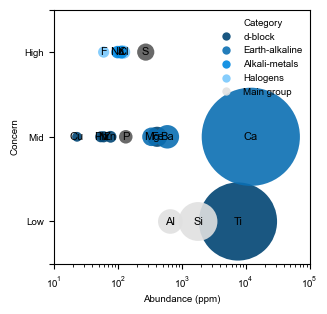

In [ ]:
df = pd.read_csv( os.path.join(data_dir, 'Data_post_consumer.csv'))

# 2. Map concern levels to numeric values
# concern_map = {'Low': 1, 'Mid': 2, 'High': 3}
# df['ConcernNumeric'] = df['Concern'].map(concern_map)

# 3. Set up the figure
plt.figure(figsize=(3.3,3.3))

custom_palette = {
    "d-block": "#014573",
    "Earth-alkaline": "#0B6FB3",
    "Alkali-metals": "#0087E0",
    "Halogens": "#79C8FC",
    "Main group": "#E0E0E0",
    "Non-metals": "#595959"
}


ax = sns.scatterplot(
    data=df,
    x='Abundance (ppm)',
    y='Concern',
    hue='Category',
    size='Abundance (ppm)',
    alpha=0.9,
    palette=custom_palette,
    sizes=(50, 5000),
    edgecolor='none'

)

handles, labels = ax.get_legend_handles_labels()


new_handles = handles[:len(set(df["Category"]))]
new_labels = labels[:len(set(df["Category"]))]


ax.legend(new_handles, new_labels, bbox_to_anchor=(0.6, 1), loc="upper left",frameon =False)
for i, row in df.iterrows():
    plt.text(row['Abundance (ppm)'], row["Concern"], row["Element"],
             ha="center", va="center", fontsize=8)

plt.xscale('log')

plt.xlabel('Abundance (ppm)')
plt.ylabel('Concern')
plt.yticks([0.5,1, 2, 3,3.5], ['','Low', 'Mid', 'High',''])
plt.xlim(10, 10**5)

plt.savefig(os.path.join(figdir, 'Abundance_vs_concern.svg'), transparent=True)
plt.show()

## Results and Discussion

### Preparation of Model Contaminated Polymer
Several contaminants were introduced on pristine PP by impregnation from solution or suspension to make a set of model systems. For example, Na was introduced as sodium acetate from an ethanol solution. Details for all the PP model samples including the various contaminants (Na, K, Ca, Mg, SiO<sub>2</sub>, TiO<sub>2</sub>, S, and Cl) used and their concentrations are given in the supplementary information (SI). Initially, the target concentration of these various impurities was set at 14x molar concentration of Na in the PCPW sample under study, leading to a loading of 0.06 mmol/g. This was done to maximize the potential impact of chemical elements present in low concentrations and allow for a comparison of deactivation effects between different impurities on a mol-by-mol basis. For chemical elements present in higher concentrations, like Ca and Ti, a second model sample with a loading equal to the PCPW was prepared. These model samples are labeled ‘high loading’.

<img
  src="figures_annotated/Fig_1.svg"
  alt="Figure 1"
  style="background-color: white; display: block; margin: 0 auto;"
/>
**Fig. 1** (a) Schematic illustration how various types of contaminants make their way into polyolefinic (PO) post consumer plastic waste (PCPW) and potential plastic cracking process. (b) Elemental analysis of mixed post-consumer polyolefin waste (PCPW) sample. Contaminations are sorted by element type and level of concern for catalytic cracking and downstream processing. Size of the circles scales with abundance. (c) Schematic illustration of the applied thermogravimetric analysis (TGA) procedure for the consecutive cracking of the model polypropylene (PP) sample spiked with Na as contaminant. (d) Weight loss profiles for consecutive cracking of the contaminated PP sample at different zeolite loadings. The loading level given in the legend is approximate. (e) Derivative TGA profiles, twl: total weight loss.

### Effect of Individual Impurities on Catalyst Activity
To test the impact of each impurity on the cracking activity, we have modified the TGA experiments, conducted in prior work.<sup>6,9</sup> The PP model systems spiked with various contaminants was cracked in a TGA crucible under N<sub>2</sub> atmosphere at 5 °C/min using zeolite US-Y at three different loadings. After burning off the coke deposits, the catalyst material was left in the pan, and additional PP was added on top for a second cracking run. This is shown in Fig. 1c. This procedure was repeated for a total of three runs. Utilizing multiple zeolite loadings in these experiments not only allows for better comparison between runs, but also probes the capacity for the various contaminants: At a low zeolite loading, over the course of three runs a significantly larger amount of impurity is introduced per gram of zeolite than at high zeolite loading. Therefore, the impact of a certain impurity at increasing concentration can be studied, allowing to assess how much of the impurity needs to be added to induce significant deactivation.
Fig. 1d shows the TGA weight loss profiles for three consecutive runs (change in color) at three different loadings (change in transparency) for experiments using the Na spiked PP model system. The difference in loading can be seen in the differences in final sample weight: At higher loading, the final relative weight of the sample is higher than at lower loading.The derivative TGA profiles are depicted in Fig. 1e. As observer earlier,<sup>6,7,9</sup> the temperature of fastest decomposition rate ¬(T<sub>max</sub>) decreases with increasing catalyst loading.
At high zeolite loading, where the amount of impurity introduced per gram of zeolite is the lowest, T<sub>max</sub> only increased very slightly over the course of three runs. At a lower zeolite loading, T<sub>max</sub> increased substantially with consecutive cracking runs, clearly indicating the occurrence of zeolite deactivation. For easier comparison, T<sub>max</sub> is plotted as a function of the zeolite material loading (Fig. 2), as already introduced previously.<sup>6,9</sup> Fig. 2a shows a control experiment with pristine PP. The cracking temperature did not decrease over the course of the three runs, showing no zeolite deactivation. This experiment further demonstrates the exceptional reproducibility of these TGA results.
Fig. 2b shows the results from the experiments using the PP material spiked with Na, as described in Fig. 1. It was found that the T<sub>max</sub> increased for consecutive runs, with the largest increase observed at low zeolite loading, where the amount of Na deposited per gram of zeolite is the largest. This demonstrates that Na leads to permanent zeolite deactivation. The most likely cause is the replacement of protons in zeolitic Brønsted acid sites (BAS) by Na ion. To test this hypothesis, the BAS density of the pristine zeolite and zeolite used for the cracking of Na-contaminated PP was compared by Py-IR spectroscopy (Fig. 3d, extended data). The contaminated Zeolite samples shown were prepared by semi-batch reactor experiments (vide infra). The Na-contaminated PP sample shows significant reduction in the BAS density, which is consistent with the poisoning of BAS by Na ions. By comparison, it was found that K caused less zeolite deactivation (Fig. 2c). We reason that due to their larger cation size, K ions are less able to replace protons in the zeolite material.

<img
  src="figures_annotated/Fig_2.svg"
  alt="Figure 2"
  style="background-color: white; display: block; margin: 0 auto;"
/>

**Fig. 2:** Temperature of the fastest decomposition rate (T<sub>max</sub>) in the catalytic cracking of pristine polypropylene (PP) (a) and the PP model samples, contaminated with alkaline (Na, and K) and earth-alkaline (Ca and Mg) metal impurities (b-f) as a function of zeolite loading. Loading of these three impurities on a pristine PP material are indicated in mmol/g. All weight loss profiles are shown in supplementary information.

#### TGA processing (code)

In [ ]:
def get_core_output(tga_exp, filename):
    Tmax = tga.calc_Tmax(tga_exp.cracking())
    T50 = tga.calc_T50(tga_exp.cracking())
    polymer_weight = tga_exp.m_poly()
    cat_weight = tga_exp.m_cat()
    coke_weight = tga_exp.m_coke()
    base_filename = filename.split('.txt')[0]
    num_loading = base_filename.split('_')[-1]
    num_run = base_filename.split('_')[-2]
    output_dict = {'filename':filename,'Tmax': Tmax, 'T50': T50, 'polymer_weight': polymer_weight, 'cat_weight': cat_weight, 'coke_weight': coke_weight, 'num_loading': num_loading, 'num_run': num_run}
    return output_dict

def add_legend(ax, ax2):
    custom_legend1 = [plt.Line2D([0], [0], color='C0', lw=2),
                    plt.Line2D([0], [0], color='C1', lw=2),
                    plt.Line2D([0], [0], color='C2', lw=2)]

    custom_legend2 = [plt.Line2D([0], [0], color='black', lw=2, alpha=1),
                    plt.Line2D([0], [0], color='black', lw=2, alpha=0.6),
                    plt.Line2D([0], [0], color='black', lw=2, alpha=0.3)]

    legend1 = ax2.legend(custom_legend1, ['Run 1', 'Run 2', 'Run 3'], title='Run', loc='upper right', bbox_to_anchor=(0.7, 1),frameon= False)
    legend2 = ax2.legend(custom_legend2, ['50%', '25%', '12%'], title='Loading', loc='upper right', bbox_to_anchor=(1, 1),frameon= False)
    ax2.add_artist(legend1)

TGA: Pristine, Na, Ca(low), K

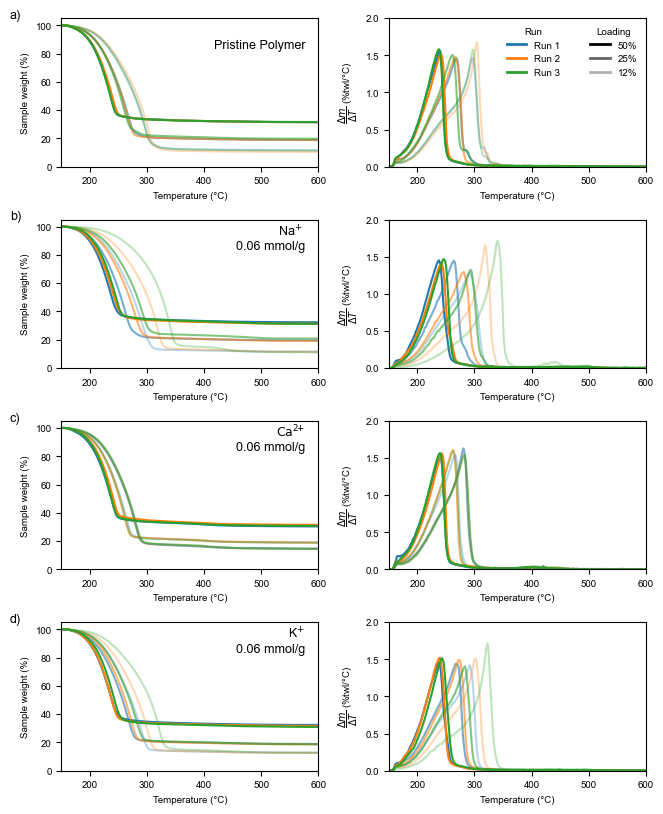

In [ ]:
data_tga = os.path.join(data_dir, 'tga')
exp_labels = pd.read_csv('utils/TGA_exp_labels.csv', names=['experiment_number', 'label'])

experiement_list  = os.listdir(data_tga)
experiments = [experiement_list[i] for i in range(4)]

color_dict = {1: 'C0', 2: 'C1', 3: 'C2'}
alpha_dict = {1: 1, 2: 0.6, 3: 0.3}

num_exps = len(experiments)
fig, ax_full =  plt.subplots(num_exps,2, figsize=(3.3*2,3.3/1.618*num_exps))

for i, selector in enumerate(experiments):
    axs = ax_full[i]
    ax = axs[0]
    ax2 = axs[1]
    rundir = os.path.join(data_tga, selector)
    dir_runs = os.listdir(os.path.join(rundir, 'raw'))
    output_frame = pd.DataFrame()
    for run in dir_runs:
        TGA_paths = os.listdir(os.path.join(rundir, 'raw', run))
        for loading in TGA_paths:
            tga_exp = tga.parse_PE(os.path.join(rundir, 'raw', run, loading),exp_type='pyro',calculate_DTGA=True)
            result_dict = get_core_output(tga_exp, loading)

            ax.plot(tga_exp.cracking()['Sample Temp.'], tga_exp.cracking()['rel_weight_twl']*100,
                    color = color_dict[int(result_dict['num_run'])],
                    alpha = alpha_dict[int(result_dict['num_loading'])])

            ax2.plot(tga_exp.cracking()['Sample Temp.'], tga_exp.cracking()['DTGA_twl']*100,
                    color = color_dict[int(result_dict['num_run'])],
                    alpha = alpha_dict[int(result_dict['num_loading'])])

            output_frame = pd.concat([output_frame, pd.DataFrame([result_dict])], ignore_index=True)

    output_frame.to_csv(os.path.join(resultdir, 'TGA','Results_full_{}.csv'.format(selector)), index=False)


    exp_num = int(selector.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'),
                xy=(0.95, 0.8), xycoords='axes fraction', ha='right', fontsize=9)

    # Formatting,labels etc
    if i == 0:
        add_legend(ax, ax2)
    for ax_sel in axs:
        ax_sel.set_xlim(150, 600)
        ax_sel.set_xlabel('Temperature (°C)')

    ax.set_ylim(0, 105)
    ax.set_ylabel('Sample weight (%)')

    ax2.set_ylabel(r'$\dfrac{\Delta m}{\Delta T}$ (%twl/°C)')
    ax2.set_ylim(0, 2)

for i, ax in enumerate(ax_full[:, 0]):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir_SI, 'All_TGAs_1.svg'))
plt.show()

TGA 2:

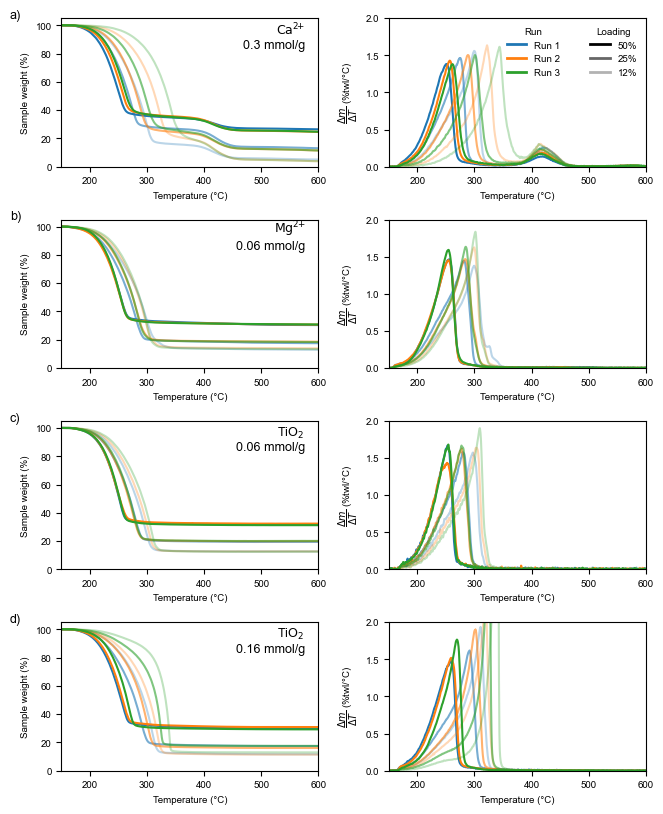

In [ ]:
def get_index_from_num(num, exp_list):
    #returns the index of the experiment in the list that starts with the given number
    # e.g. 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 -> '001', '002', '003', etc.
    num_str = str(num).zfill(3)
    for i, exp in enumerate(exp_list):
        if exp.startswith(num_str):
            return i



experiments = [experiement_list[get_index_from_num(i, experiement_list)] for i in [31,6,5,32]]

num_exps = len(experiments)
fig, ax_full =  plt.subplots(num_exps,2, figsize=(3.3*2,3.3/1.618*num_exps))

for i, selector in enumerate(experiments):
    axs = ax_full[i]
    ax = axs[0]
    ax2 = axs[1]
    rundir = os.path.join(data_tga, selector)
    dir_runs = os.listdir(os.path.join(rundir, 'raw'))
    output_frame = pd.DataFrame()
    for run in dir_runs:
        TGA_paths = os.listdir(os.path.join(rundir, 'raw', run))
        for loading in TGA_paths:
            tga_exp = tga.parse_PE(os.path.join(rundir, 'raw', run, loading),exp_type='pyro',calculate_DTGA=True)
            result_dict = get_core_output(tga_exp, loading)

            ax.plot(tga_exp.cracking()['Sample Temp.'], tga_exp.cracking()['rel_weight_twl']*100,
                    color = color_dict[int(result_dict['num_run'])],
                    alpha = alpha_dict[int(result_dict['num_loading'])])

            ax2.plot(tga_exp.cracking()['Sample Temp.'], tga_exp.cracking()['DTGA_twl']*100,
                    color = color_dict[int(result_dict['num_run'])],
                    alpha = alpha_dict[int(result_dict['num_loading'])])

            output_frame = pd.concat([output_frame, pd.DataFrame([result_dict])], ignore_index=True)

    output_frame.to_csv(os.path.join(resultdir, 'TGA','Results_full_{}.csv'.format(selector)), index=False)


    exp_num = int(selector.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'),
                xy=(0.95, 0.8), xycoords='axes fraction', ha='right', fontsize=9)

    # Formatting,labels etc
    if i == 0:
        add_legend(ax, ax2)
    for ax_sel in axs:
        ax_sel.set_xlim(150, 600)
        ax_sel.set_xlabel('Temperature (°C)')

    ax.set_ylim(0, 105)
    ax.set_ylabel('Sample weight (%)')

    ax2.set_ylabel(r'$\dfrac{\Delta m}{\Delta T}$ (%twl/°C)')
    ax2.set_ylim(0, 2)

for i, ax in enumerate(ax_full[:, 0]):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir_SI, 'All_TGAs_2.svg'))
plt.show()

TGA 3: Silica, Sulfate, NH4Cl, Phthalocyanine Green

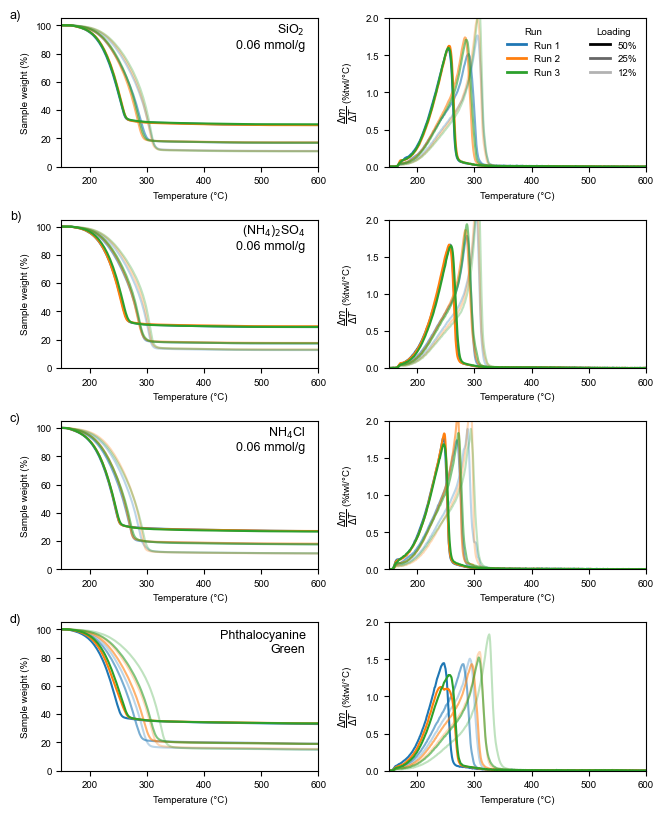

In [ ]:
experiments = [experiement_list[get_index_from_num(i, experiement_list)] for i in [7,8,9,10]]

num_exps = len(experiments)
fig, ax_full =  plt.subplots(num_exps,2, figsize=(3.3*2,3.3/1.618*num_exps))

for i, selector in enumerate(experiments):
    axs = ax_full[i]
    ax = axs[0]
    ax2 = axs[1]
    rundir = os.path.join(data_tga, selector)
    dir_runs = os.listdir(os.path.join(rundir, 'raw'))
    output_frame = pd.DataFrame()
    for run in dir_runs:
        TGA_paths = os.listdir(os.path.join(rundir, 'raw', run))
        for loading in TGA_paths:
            tga_exp = tga.parse_PE(os.path.join(rundir, 'raw', run, loading),exp_type='pyro',calculate_DTGA=True)
            result_dict = get_core_output(tga_exp, loading)

            ax.plot(tga_exp.cracking()['Sample Temp.'], tga_exp.cracking()['rel_weight_twl']*100,
                    color = color_dict[int(result_dict['num_run'])],
                    alpha = alpha_dict[int(result_dict['num_loading'])])

            ax2.plot(tga_exp.cracking()['Sample Temp.'], tga_exp.cracking()['DTGA_twl']*100,
                    color = color_dict[int(result_dict['num_run'])],
                    alpha = alpha_dict[int(result_dict['num_loading'])])

            output_frame = pd.concat([output_frame, pd.DataFrame([result_dict])], ignore_index=True)

    output_frame.to_csv(os.path.join(resultdir, 'TGA','Results_full_{}.csv'.format(selector)), index=False)


    exp_num = int(selector.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'),
                xy=(0.95, 0.8), xycoords='axes fraction', ha='right', fontsize=9)

    # Formatting,labels etc
    if i == 0:
        add_legend(ax, ax2)
    for ax_sel in axs:
        ax_sel.set_xlim(150, 600)
        ax_sel.set_xlabel('Temperature (°C)')

    ax.set_ylim(0, 105)
    ax.set_ylabel('Sample weight (%)')

    ax2.set_ylabel(r'$\dfrac{\Delta m}{\Delta T}$ (%twl/°C)')
    ax2.set_ylim(0, 2)

for i, ax in enumerate(ax_full[:, 0]):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir_SI, 'All_TGAs_3.svg'))
plt.show()

TGA 4: Chlorine

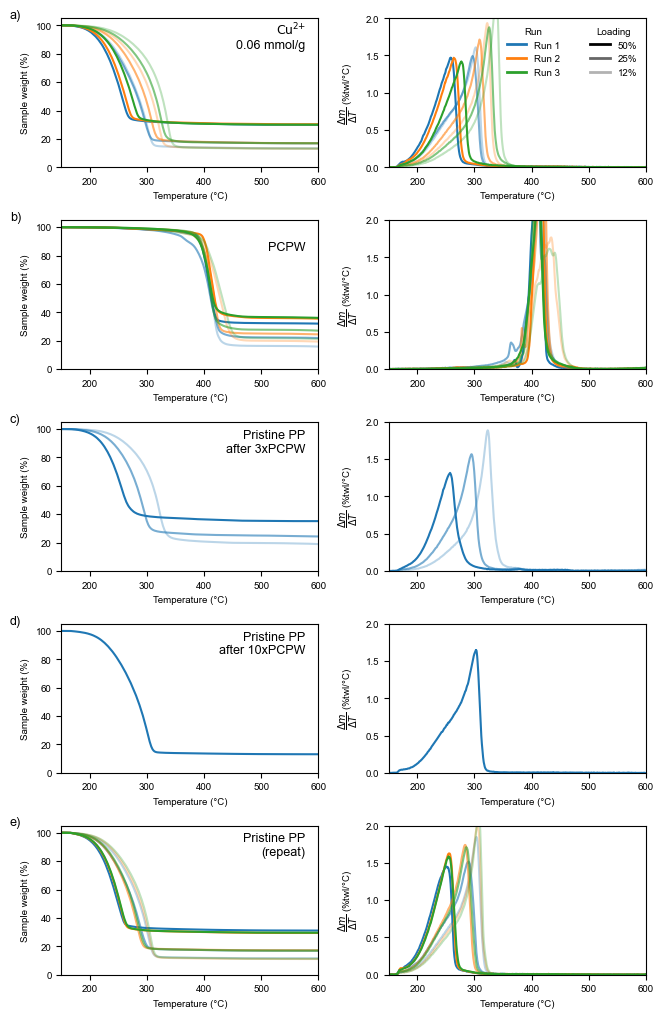

In [ ]:
experiments = [experiement_list[get_index_from_num(i, experiement_list)] for i in [11,24,25,26,30]]

num_exps = len(experiments)
fig, ax_full =  plt.subplots(num_exps,2, figsize=(3.3*2,3.3/1.618*num_exps))

for i, selector in enumerate(experiments):
    axs = ax_full[i]
    ax = axs[0]
    ax2 = axs[1]
    rundir = os.path.join(data_tga, selector)
    dir_runs = os.listdir(os.path.join(rundir, 'raw'))
    output_frame = pd.DataFrame()
    for run in dir_runs:
        TGA_paths = os.listdir(os.path.join(rundir, 'raw', run))
        for loading in TGA_paths:
            tga_exp = tga.parse_PE(os.path.join(rundir, 'raw', run, loading),exp_type='pyro',calculate_DTGA=True)
            result_dict = get_core_output(tga_exp, loading)

            ax.plot(tga_exp.cracking()['Sample Temp.'], tga_exp.cracking()['rel_weight_twl']*100,
                    color = color_dict[int(result_dict['num_run'])],
                    alpha = alpha_dict[int(result_dict['num_loading'])])

            ax2.plot(tga_exp.cracking()['Sample Temp.'], tga_exp.cracking()['DTGA_twl']*100,
                    color = color_dict[int(result_dict['num_run'])],
                    alpha = alpha_dict[int(result_dict['num_loading'])])

            output_frame = pd.concat([output_frame, pd.DataFrame([result_dict])], ignore_index=True)

    output_frame.to_csv(os.path.join(resultdir, 'TGA','Results_full_{}.csv'.format(selector)), index=False)


    exp_num = int(selector.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'),
                xy=(0.95, 0.8), xycoords='axes fraction', ha='right', fontsize=9)

    # Formatting,labels etc
    if i == 0:
        add_legend(ax, ax2)
    for ax_sel in axs:
        ax_sel.set_xlim(150, 600)
        ax_sel.set_xlabel('Temperature (°C)')

    ax.set_ylim(0, 105)
    ax.set_ylabel('Sample weight (%)')

    ax2.set_ylabel(r'$\dfrac{\Delta m}{\Delta T}$ (%twl/°C)')
    ax2.set_ylim(0, 2)

for i, ax in enumerate(ax_full[:, 0]):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir_SI, 'All_TGAs_4.svg'))
plt.show()

#### Fig. 2 (code)

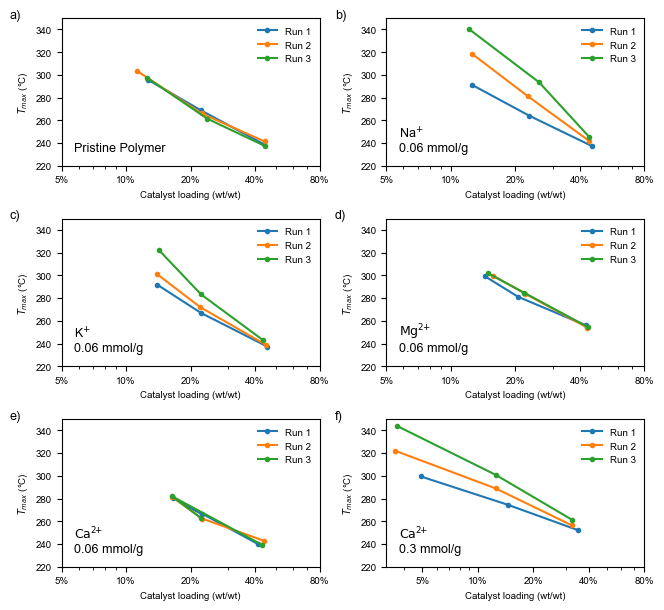

In [ ]:
tga_experiments = os.listdir(os.path.join(data_dir, 'tga'))
exp_labels = pd.read_csv('utils/TGA_exp_labels.csv',names=['experiment_number', 'label'])
sel_exp_nums = [1,2,4,6,3,31]



color_dict = {1: 'C0', 2: 'C1', 3: 'C2'}

fig, axs = plt.subplots(3, 2, figsize=(3.3*2,3.3/1.618*3))
for i, num in enumerate(sel_exp_nums):
    ax = axs[i//2,(i+2)%2]
    exp = tga_experiments[get_index_from_num(num, tga_experiments)]
    df = pd.read_csv(os.path.join(resultdir,'tga', 'Results_full_'+exp+'.csv'))
    for run in df['num_run'].unique():
        df_run = df[df['num_run'] == run]
        ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color=color_dict[run],label='Run ' + str(run))

    #Formatting
    ax.set_xscale('log')
    ax.set_ylim(220,350)
    ticks1 = [5,10,20,40,80]
    ax.legend(frameon=False)

    ax.set_xticks(ticks1)
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.set_xticklabels([str(x)+ '%' for x in ticks1])
    ax.set_xlabel('Catalyst loading (wt/wt)')
    ax.set_ylabel('$T_{max}$ (°C)')
    exp_num = int(exp.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'),
                xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)
# add a-f
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_2.svg'), transparent=True)

### Earth Alkali Metals
As a second category of impurities, two earth-alkaline metal ions, namely Ca and Mg, were investigated. For this purpose, Ca and Mg stearate were used as impurities spiked onto the PP model sample. At a concentration of 0.06 mmol/g, the same level used in the experiments with alkaline metal ions, no significant deactivation was observed for both Mg and Ca. This suggests that these earth alkaline metal ions do not substantially exchange with the BAS protons at the conditions tested. For Mg, the BAS density probed by Py-IR spectroscopy did indeed not drop. However, for Ca a BAS density even lower than for Na was measured (Fig. 3d). We presently cannot offer a convincing explanation why this decrease in BAS density does not lead to a deactivation. However, for both Ca and Mg, a significant increase in Lewis acidity (LAS) was observed (Fig. 3d). One might hypothesize that the introduction of LAS in turn increases the activity for the Ca spiked PP model sample, but we deem it unlikely that this factor perfectly cancels out the effects of BAS poisoning for Ca. When the Ca concentration was raised to a level comparable to that found in the PCPW sample (i.e., 0.3 mmol/g), noticeable catalyst deactivation was observed, which might result from both acid site poisoning and pore blockage. Indeed, even low levels of Ca caused a decrease in meso- and micropore volume (Fig. 3e)

### Oxides
In a third category of impurities, we have turned our attention to TiO<sub>2</sub> and SiO<sub>2</sub>. At low contaminant loadings, metal oxides including TiO<sub>2</sub> and SiO<sub>2</sub>, commonly used as filler materials, did not lead to significant zeolite deactivation (Fig. 3a, c). For TiO<sub>2</sub>, a slight increase <15 °C in *T*<sub>max</sub> was observed at the lowest catalyst loading. This is expected, as these materials are rather inert, and Py-IR spectroscopy did not show any reduction in zeolite BAS density when TiO<sub>2</sub> is added as contaminant. At high loadings of TiO<sub>2</sub>, however, a more pronounced increase in *T*<sub>max</sub> was observed, especially in the third run (Fig. 3b). N<sub>2</sub> physisorption of the recovered catalyst revealed a reduction in pore volume with increasing loading of TiO<sub>2</sub>   (Fig. 3e). This reduction in pore volume however most likely did not stem from pore blockage but rather is a dilution effect, where the low pore volume of TiO<sub>2</sub> contributes to the measured value. Scanning transition electron microscopy with energy dispersive X-ray  (STEM-EDX) showed that Ti was found largely as particles (20-50 nm in size) at the external surface of the zeolite (Fig. 3f,g). However, at very high loadings, the contaminant might cover more and more of the external surface, making the external surface and mesopores less accessible to the polymer.

<img
  src="figures_annotated/Fig_3.svg"
  alt="Figure 3"
  style="background-color: white; display: block; margin: 0 auto;"
/>

**Fig. 3:** Temperature of the fastest decomposition rate (Tmax) in the catalytic cracking of polypropylene (PP) model system spiked with TiO<sub>2</sub> (a, b) and SiO<sub>2</sub> (c). All weight loss profiles are shown in the supplementary information. (d) Brønsted acid site (BAS) and Lewis acid site (LAS) density (LAS) of zeolite US-Y after cracking of the contaminated polypropylene (PP) model samples using a semi-batch reactor probed by infrared (IR) spectroscopy of adsorbed pyridine. Error bars adapted from the error of the utilized extinction coefficient.<sup>26</sup> (e) Total, mesopore and micropore volume for pristine zeolite US-Y as well as the zeolite US-Y material recovered and calcined after cracking of a TiO<sub>2</sub> spiked polypropylene (PP) model sample using a semi-batch reactor. The isotherms can be found in the supplementary information. (f, g) Scanning transmission electron micrographs of US-Y after cracking if TiO<sub>2</sub> spiked PP (0.16 mmol/g) using high-angle annular dark-field (HAADF) imaging. TiO<sub>2</sub> particles were identified using energy-dispersive X-ray mapping.

### Fig. 3 (code)

#### Fig. 3a-c: TGA for oxides

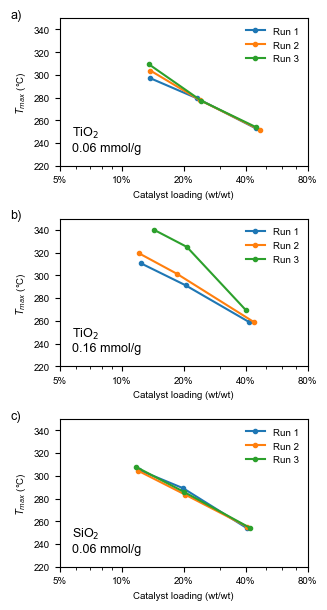

In [ ]:
sel_exp_nums = [5,32,7]
color_dict = {1: 'C0', 2: 'C1', 3: 'C2'}

fig, axs = plt.subplots(3, 1, figsize=(3.3,3.3/1.618*3))
for i, num in enumerate(sel_exp_nums):
    ax = axs[i]
    exp = tga_experiments[get_index_from_num(num, tga_experiments)]
    df = pd.read_csv(os.path.join(resultdir,'tga', 'Results_full_'+exp+'.csv'))
    for run in df['num_run'].unique():
        df_run = df[df['num_run'] == run]
        ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color=color_dict[run],label='Run ' + str(run))

    #Formatting
    ax.set_xscale('log')
    ax.set_ylim(220,350)
    ticks1 = [5,10,20,40,80]
    ax.legend(frameon=False)

    ax.set_xticks(ticks1)
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.set_xticklabels([str(x)+ '%' for x in ticks1])
    ax.set_xlabel('Catalyst loading (wt/wt)')
    ax.set_ylabel('$T_{max}$ (°C)')
    exp_num = int(exp.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'),
                xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)
# add a-f
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_3a-c.svg'), transparent=True)

#### Pyrdine Infrared Spectroscopy
See prior work for complete details

In [ ]:
%matplotlib inline
from utils import IR_utils as ir
from spectrochempy_omnic import OMNICReader as read
import xarray as xr
from utils import db_query as dbq

spectrochempy-omnic - INFO - The nature of data is not recognized, title set to 'Intensity'
spectrochempy-omnic - INFO - The nature of data is not recognized, title set to 'Intensity'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_31856\4019406321.py:19: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


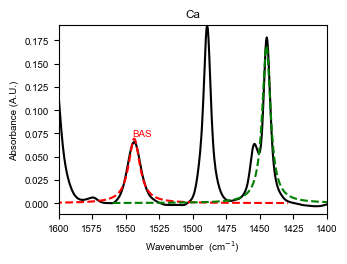

spectrochempy-omnic - INFO - The nature of data is not recognized, title set to 'Intensity'
spectrochempy-omnic - INFO - The nature of data is not recognized, title set to 'Intensity'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_31856\4019406321.py:19: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


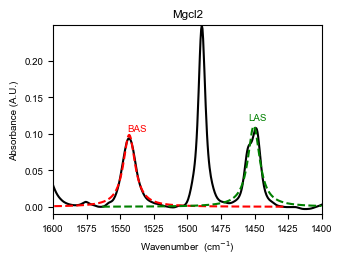

spectrochempy-omnic - INFO - The nature of data is not recognized, title set to 'Intensity'
spectrochempy-omnic - INFO - The nature of data is not recognized, title set to 'Intensity'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_31856\4019406321.py:19: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


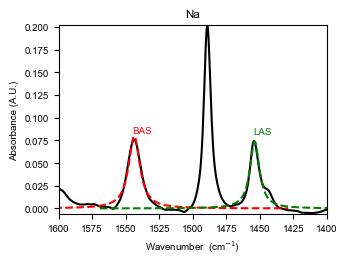

spectrochempy-omnic - INFO - The nature of data is not recognized, title set to 'Intensity'
spectrochempy-omnic - INFO - The nature of data is not recognized, title set to 'Intensity'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_31856\4019406321.py:19: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


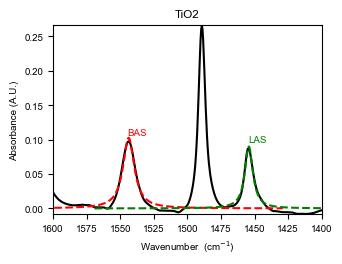

spectrochempy-omnic - INFO - The nature of data is not recognized, title set to 'Intensity'
spectrochempy-omnic - INFO - The nature of data is not recognized, title set to 'Intensity'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_31856\4019406321.py:19: RuntimeWarning: invalid value encountered in log10
  scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))


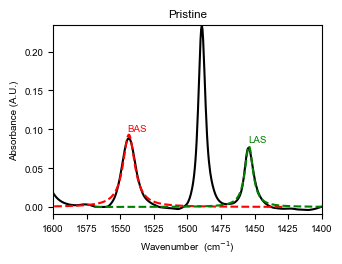

In [ ]:
data_dir_py = os.path.join(data_dir, 'Py_IR')# # list directories
experiments = os.listdir(data_dir_py)
selector = [0,1,2,3,4]
dosed_spectra_pyridine = []
plot_spectrum = True
plot_spectrum_full = False #also plots the full spectrum (not only the region of interest)
for i in selector:
    ### Loading of data----------------------------
    exp_name = experiments[i]
    exp_path = data_dir_py +'/'+ exp_name + '/'
    #the log file is a labview logfile containing most importantly the temperature over the course of the experiment
    log = ir.parse_log(exp_path)

    #the data file is a omnic .spg file containing all the spectra of the experiment. Spectra are recorded in single channel mode
    files = os.listdir(exp_path+"/spectra_all/")
    data_file = exp_path+"/spectra_all/"+ files[0]
    background = read(glob.glob(exp_path +'/background'+ '/*.SPA')[0])
    scp_ar = read(data_file)
    scp_ar_bg = np.abs((np.log10(background.data)-np.log10(scp_ar.data)))

    wavenumbers = scp_ar.x
    timestamps = pd.to_datetime(scp_ar.y, unit='s', origin='unix').tz_localize('UTC').tz_convert('Europe/Amsterdam')

    indices = np.searchsorted(log['DateTime'], timestamps, side='left')
    indices = np.clip(indices, 0, len(log['DateTime'])-1)
    temp_spec = np.array(log['OvenTemperature'][indices].reset_index(drop=True))

    data_array = xr.DataArray(
        scp_ar_bg.data,
        dims=['time', 'wavenumber'],
        coords={
            'time': timestamps,
            'wavenumber': wavenumbers,
            'temperature': ('time', temp_spec)
        }
    )[::-1]
    del scp_ar

    #the background is aquired before the actual experiment to allow to look at spectra without the zeolite already substracted

    index_lib = ir.get_indices(exp_path,exp_name,save_indices=False,print_indices = False) #looks up a file that contains 'indices' and returns a library with the indices therein
    #the experiment is split into multiple stages using a list of idices.
    #for determination of the indices, plot the absorption at e.g. 1545 cm-1 and the tempearture as a function of the index of the spectra
    #baseline (aquired during cooling down after drying), dosing, desorption, and drying
    data_array_bl, data_array_dose, data_array_desorb, data_array_dry = ir.split_experiment(data_array,index_lib)

    ### Baseline correction----------------------------
    # the spectra of the zeolite at the appropriate temperature are substracted for dosing and desorption spectra
    data_array_dose_corr = ir.baseline_substract(data_array_bl,data_array_dose)
    data_array_desorb_corr = ir.baseline_substract(data_array_bl,data_array_desorb)

    if plot_spectrum_full: # plotting of the individual spectra
        fig, ax = plt.subplots(figsize=(3.3,3.3/np.sqrt(2)))
        ax.plot(wavenumbers, data_array_dose_corr[-1].values, c='C0')
        ax.set_xlabel('Wavenumbers (cm$^{-1}$)')
        ax.set_ylabel('Absorbance (A.U.)')
        ax.set_xlim(4000,1400)
        maximum = max(ir.get_slice(data_array_dose_corr[-1],4000,1400).values)
        minimum = min(ir.get_slice(data_array_dose_corr[-1],4000,1400).values)
        ax.set_ylim(minimum, maximum)

        peakpos_other = [[2918,' '],[1538,'BAS'],[1457,'LAS'],[3741,'Si-OH'],[3625, 'O-H$_{HF}$'],[3560, 'O-H$_{LF}$'] ]#
        for i in range(len(peakpos_other)):
            ax.axvline(peakpos_other[i][0], c='k', linestyle='--',alpha=0.3)
            ax.annotate(peakpos_other[i][1], (peakpos_other[i][0]-20,maximum*0.75),rotation=90, va='bottom', ha='center',fontsize=7)


        ax.tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')


    ### Quantification----------------------------

    peak_names = ['BAS_Py','LAS_Py']
    extinction_coefficients = [1.54,1.71] #taken from 10.1016/j.jcat.2020.03.003
    colors = ['r','g']
    peak_pos = [1545.0,1455.0]
    pelett_diameter = 13 #mm
    spectrum = data_array_dose_corr[-1] # the last spectrum of the desing part is used in the quantification

    #determining mass of the
    try:
        tga_file = glob.glob(exp_path + '/tga//*.txt')[0]
        tga_instance = tga.parse_txt(tga_file,calculate_DTGA = False)
        mass_zeolite_dry = tga_instance.get_stage('stage2')['Unsubtracted weight'].min()
    except:
        print('no tga for'+exp_name)
        metafile = pd.read_csv(glob.glob(exp_path + '/meta.txt')[0])
        mass_zeolite_dry = metafile['dryweight'][0]
        print('not using TGA for weight')

    utils.set_plot_params()
    data = spectrum.sel(wavenumber=slice(2000,1400))
    data_mincorr = data - data.sel(wavenumber=slice(1600,1560)).min()
    if plot_spectrum:
        fig, ax = plt.subplots()
        ax.plot(data_mincorr.wavenumber, data_mincorr,c='black')
        ax.set_ylim(min(data_mincorr),max(data_mincorr))
        ax.set_xlim(1600,1400)
        ax.set_xlabel('Wavenumber  (cm$^{-1}$)')
        ax.set_ylabel('Absorbance (A.U.)')

    for j in range(len(peak_names)):
        area_peak, peak_intensity,fitcurve = ir.fit_integrate_peak(data_mincorr, peak_pos[j], 25, 15, 'lorentzian', plot='multi')
        xdata,ydata =fitcurve.get_data()
        if plot_spectrum:
            ax.plot(xdata,ydata,c=colors[j],linestyle='--')
            ax.annotate(peak_names[j][0:3],(peak_pos[j],peak_intensity*1.1),color=colors[j],)

        acid_site_density = area_peak*np.pi*(pelett_diameter/10/2)**2/extinction_coefficients[j]/mass_zeolite_dry*1000 #in µmol/g
        #writing to DB
        impurity = exp_name.split('_')[1]
        if impurity == 'SR' or impurity == 'PI':
            impurity = 'Pristine'
        dbq.write_db(impurity,peak_names[j],acid_site_density)
        dbq.write_db(impurity,peak_names[j],acid_site_density)
    if plot_spectrum:
        plt.title(impurity)
        plt.show()


    #saving the dosed spectrum
    dosed_spectrum_frame = pd.DataFrame({'wavenumber':spectrum.wavenumber.values,'absorbance':spectrum.values, 'absorbance_byweight':spectrum.values/mass_zeolite_dry})
    dosed_spectrum_frame.to_csv(os.path.join(resultdir,'Py_dosed_spectra',impurity +'_py_dosed_spectrum'+'.csv'))

    dosed_spectra_pyridine.append([impurity, spectrum/mass_zeolite_dry])

Plotting all spectra together

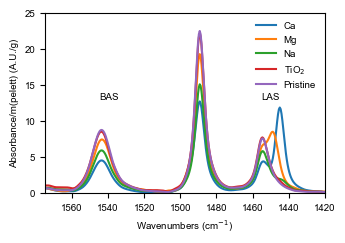

In [ ]:
fig, ax = plt.subplots()

#sort dosed spectra by SAR
# dosed_spectra_pyridine.sort(key=lambda x: dbq.read_db(x[0],'Al_cont_mmol_g'),reverse=True)
label_dict = {'Na':'Na','Ca':'Ca','Mgcl2':'Mg','TiO2':'TiO$_2$','Pristine':'Pristine'}

for i in range(len(dosed_spectra_pyridine)):
    data_blcorr = dosed_spectra_pyridine[i][1] - dosed_spectra_pyridine[i][1].sel(wavenumber=slice(1600,1400)).min()
    if dosed_spectra_pyridine[i][0]!='Z53':
        ax.plot(dosed_spectra_pyridine[i][1].wavenumber, data_blcorr*1000, label = label_dict[dosed_spectra_pyridine[i][0]])
ax.set_xlim(1575,1420)
ax.set_ylim(0, 25)
ax.set_xlabel('Wavenumbers (cm$^{-1}$)')
ax.set_ylabel('Absorbance/m(pelett) (A.U./g)')

#annotate with BAS and LAS
ax.annotate('BAS',(1545,13),color='black')
ax.annotate('LAS',(1455,13),color='black')

plt.legend(frameon=False,ncol=1)
plt.tight_layout()
plt.savefig(os.path.join(figdir_SI,'Pyridine_dosed_spectra.svg'),transparent=True)
plt.show()

Barchart with Acidities

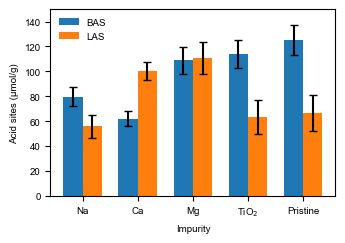

In [ ]:
db = dbq.get_db()
catalysts = db.index
cat_names = ['Na', 'Ca', 'Mg', 'TiO$_2$', 'Pristine']
property1 = db['BAS_Py']
property2 = db['LAS_Py']

fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(np.arange(len(catalysts)), property1, bar_width,yerr=property1*0.15/1.54,capsize=3, label='BAS', color='C0')
bar2 = ax.bar(np.arange(len(catalysts)) + bar_width, property2, bar_width,yerr=property1*0.2/1.71,capsize=3, label='LAS', color='C1')


ax.set_ylim(0, 150)
ax.set_xlabel('Impurity')
ax.set_ylabel('Acid sites (µmol/g)')
ax.set_xticks(np.arange(len(catalysts)) + bar_width / 2)
ax.set_xticklabels(cat_names)
ax.legend(frameon=False, loc='upper left')

plt.tight_layout()

plt.savefig(os.path.join(figdir,'Barchart_Pyridine.svg'),transparent=True)
plt.show()

#### Physisorption
Plotting Isotherms

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_31856\3148718396.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return sheet.loc['Sample'][0]
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_31856\3148718396.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return sheet.loc['Sample'][0]
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_31856\3148718396.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return sheet.loc['Samp

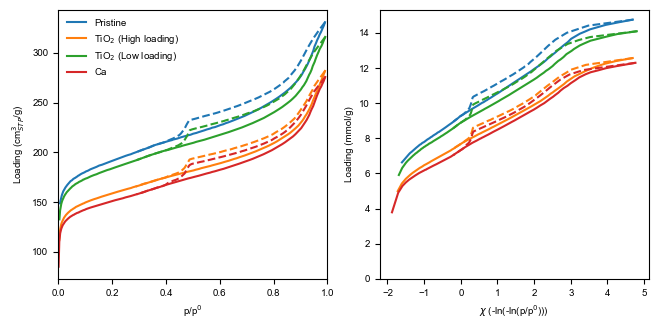

In [ ]:
import pygaps.parsing as pgp
import pygaps.graphing as pgg
import pygaps.characterisation as pgc

# processing of isotherms
data_isotherms = os.path.join(data_dir, 'physisorption')
paths = os.listdir(data_isotherms)

# list of paths to files
selector = [3,0,2,1]
selected_paths = [paths[i] for i in selector]
isotherms = [pgp.isotherm_from_commercial(os.path.join(data_isotherms,path), '3p', 'xl') for path in selected_paths]

def get_sample_label(path):
    sheet = pd.read_excel(os.path.join(data_isotherms,path), sheet_name='Summary',index_col=0)
    return sheet.loc['Sample'][0]


names = [get_sample_label(path) for path in selected_paths]
label_dict = {'NF_ZY_HiTi': 'TiO$_2$ (High loading)','zeolite y contaminated Ca': 'Ca','NF_ZY_lowTi': 'TiO$_2$ (Low loading)','Z03_CBV780': 'Pristine' }
labels = [label_dict[i] for i in names]

# colors = [dbq.read_db(i,'plotcolor') for i in codes]
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

for i in range(len(isotherms)):
    isotherms[i].material = labels[i]

fig, ax = plt.subplots(1,2,figsize=(3.3*2,3.3))

#Isotherm plot
ax[0] = pgg.plot_iso(
    isotherms,
    x_range=(0,1),
    lgd_keys=['material'],
    color=colors,ax=ax[0],marker=False
)
ax[0].set_xlabel('p/p$^0$')
ax[0].set_ylabel('Loading (cm$_{STP}^3$/g)')
ax[0].set_xlim(0)

#Chi Plot - allows to comapre isotherms easier
for i in range(len(isotherms)):
    isotherms[i].convert_loading(unit_to='mmol')
    chi = -np.log(-np.log(isotherms[i].data(branch = 'ads')['pressure']))
    loading = isotherms[i].data(branch = 'ads')['loading']
    ax[1].plot(chi,loading, color = colors[i],label = labels[i])
    chi_des = -np.log(-np.log(isotherms[i].data(branch = 'des')['pressure']))
    loading_des = isotherms[i].data(branch = 'des')['loading']
    ax[1].plot(chi_des,loading_des, color = colors[i],label = labels[i],linestyle='--')


ax[1].set_xlabel(r'$\chi$ (-ln(-ln(p/p$^0$)))')
ax[1].set_ylabel('Loading (mmol/g)')
ax[1].set_ylim(0,)
ax[0].legend(fontsize =7,ncol=1,frameon= False)

plt.tight_layout()
plt.savefig(os.path.join(figdir_SI,'isotherms.svg'),transparent=True)
plt.show()

BET

In [ ]:
#processing BET
for i in range(len(isotherms)):
    result_BET = pgc.area_BET(isotherms[i],verbose=False ) # to show additional paremeters set verbose to True and uncomment plt.show()
    # plt.show()
    #writing to databse:
    dbq.write_db(labels[i],'S.A.(BET)',np.round(result_BET['area'],0),db_path='Results/physisorption_outputs.csv')

Pore Volume

In [ ]:
def determine_porevolume(isotherm,p_set = 0.99):
    isotherm.convert_loading(unit_to='mol')
    pore_volume = isotherm.data(branch='ads')\
    .iloc[isotherm.data(branch='ads')['pressure'].sub(p_set).abs().idxmin()]['loading']\
        /isotherm.adsorbate.liquid_density(isotherm.temperature)\
        *isotherm.adsorbate.molar_mass()
    return pore_volume

for i in range(len(isotherms)):
    pore_volume = determine_porevolume(isotherms[i])
    dbq.write_db(labels[i],'Pore_volume_cm3',pore_volume,db_path='Results/physisorption_outputs.csv')

t-plot

In [ ]:
def aerosil_MCM(pressure: float) -> float:
    """
    Hybrid curve using aerosil data at low pressure and MCM data at higher pressure
    Taken from: https://doi.org/10.1021/la5026679, based on
    https://doi.org/10.1016/j.micromeso.2010.10.006 and https://doi.org/10.1021/la0105477


    Applicable for nitrogen at 77K, used for mesoporous zeolites.
    Be aware that this method still needs an additional empirical correction to get a more accurate micro/mosopore volume.

    Parameters
    ----------
    pressure : float
        Relative pressure.

    Returns
    -------
    float
        Thickness of layer in nm.
    """
    pm = {
        "A1": 0.1887299, "A2": 481.3 * -1, "A3": 0.182099, "A4": -1 * 23.78,
        "B1": 0.5675647, "B2": 0.199735, "B3": 0.4116168, "B4": 2.00834,
        "C1": 0.1423566, "C2": 0.1078, "C3": 0.4888,
        "D1": 0.08309076, "D2": 0.02995, "D3": 0.369,
        "E1": 1.268066, "E2": 1.931, "E3": 0.76934, "E4": 51.09,
    }

    def calc_t(p, pm):
        if p < 0.03:
            t = pm['A1'] * (1 - np.exp(pm['A2'] * p)) + pm["A3"] * (1 - np.exp(pm['A4'] * p))
        elif p >= 0.03 and p < 0.25:
            t = pm['B1'] * p**pm['B2'] + pm['B3'] * p**pm['B4']
        elif p >= 0.25 and p < 0.6:
            t = (pm["C1"] / (pm['C2'] - np.log10(p)))**pm['C3']
        elif p >= 0.6 and p < 0.9:
            t = (pm["D1"] / (pm['D2'] - np.log10(p)))**pm['D3']
        else:
            t = pm['E1'] * p**pm['E2'] + pm['E3'] * p**pm['E4']
        return t
    calc_t_v = np.vectorize(calc_t)
    thickness_array = calc_t_v(pressure, pm)
    return thickness_array

For linear region 1
The slope is 7.704 and the intercept is 5.249, with a correlation coefficient of 0.9999
The adsorbed volume is 0.182 cm3/g and the area is 267.7 m2/g


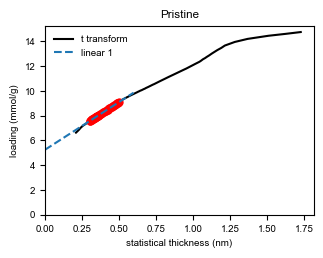

For linear region 1
The slope is 6.388 and the intercept is 4.347, with a correlation coefficient of 0.9999
The adsorbed volume is 0.151 cm3/g and the area is 221.9 m2/g


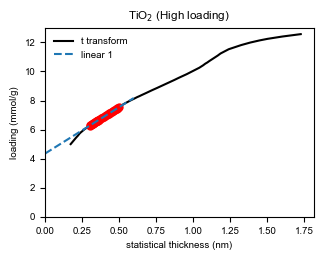

For linear region 1
The slope is 7.28 and the intercept is 5.088, with a correlation coefficient of 0.9998
The adsorbed volume is 0.177 cm3/g and the area is 252.9 m2/g


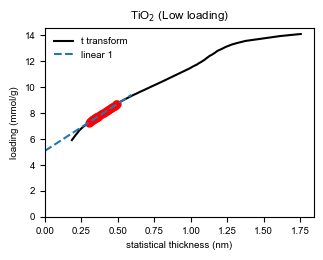

For linear region 1
The slope is 5.891 and the intercept is 4.219, with a correlation coefficient of 0.9998
The adsorbed volume is 0.147 cm3/g and the area is 204.7 m2/g


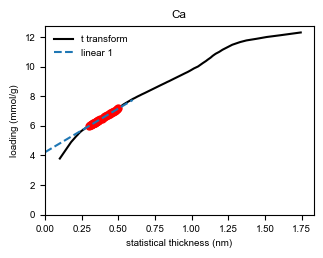

In [ ]:
# def aerosil_MCM(pressure: float) -> float:
#     """
#     Hybrid curve using aerosil data at low pressure and MCM data at higher pressure
#     Taken from: https://doi.org/10.1021/la5026679, based on
#     https://doi.org/10.1016/j.micromeso.2010.10.006 and https://doi.org/10.1021/la0105477


#     Applicable for nitrogen at 77K, used for mesoporous zeolites.
#     Be aware that this method still needs an additional empirical correction to get a more accurate micro/mosopore volume.

#     Parameters
#     ----------
#     pressure : float
#         Relative pressure.

#     Returns
#     -------
#     float
#         Thickness of layer in nm.
#     """
#     pm = {
#         "A1": 0.1887299, "A2": 481.3 * -1, "A3": 0.182099, "A4": -1 * 23.78,
#         "B1": 0.5675647, "B2": 0.199735, "B3": 0.4116168, "B4": 2.00834,
#         "C1": 0.1423566, "C2": 0.1078, "C3": 0.4888,
#         "D1": 0.08309076, "D2": 0.02995, "D3": 0.369,
#         "E1": 1.268066, "E2": 1.931, "E3": 0.76934, "E4": 51.09,
#     }

#     def calc_t(p, pm):
#         if p < 0.03:
#             t = pm['A1'] * (1 - np.exp(pm['A2'] * p)) + pm["A3"] * (1 - np.exp(pm['A4'] * p))
#         elif p >= 0.03 and p < 0.25:
#             t = pm['B1'] * p**pm['B2'] + pm['B3'] * p**pm['B4']
#         elif p >= 0.25 and p < 0.6:
#             t = (pm["C1"] / (pm['C2'] - np.log10(p)))**pm['C3']
#         elif p >= 0.6 and p < 0.9:
#             t = (pm["D1"] / (pm['D2'] - np.log10(p)))**pm['D3']
#         else:
#             t = pm['E1'] * p**pm['E2'] + pm['E3'] * p**pm['E4']
#         return t
#     calc_t_v = np.vectorize(calc_t)
#     thickness_array = calc_t_v(pressure, pm)
#     return thickness_array

show_t_plots = True #set True to show t-plot fit

for i in range(len(isotherms)):
    results_tplot = pgc.t_plot(isotherms[i],t_limits=[0.3,0.5],thickness_model=aerosil_MCM, verbose= show_t_plots)
    # results_tplot = pgc.t_plot(isotherms[i],t_limits=[0.3,0.5], verbose= show_t_plots)

    if show_t_plots:
        plt.title(labels[i])
        plt.xlabel('statistical thickness (nm)')
        plt.ylabel('loading (mmol/g)')
        plt.show()

    micropore_volume = results_tplot['results'][0]['adsorbed_volume']
    mesopore_volume = dbq.read_db(labels[i],'Pore_volume_cm3',db_path='Results/physisorption_outputs.csv') - micropore_volume

    dbq.write_db(labels[i],'t_plot_mesopore_volume_cm3',mesopore_volume,db_path='Results/physisorption_outputs.csv')
    dbq.write_db(labels[i],'t_plot_micropore_volume_cm3',micropore_volume,db_path='Results/physisorption_outputs.csv')

Barchart of Pore Volumes

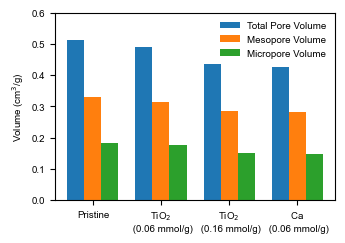

In [ ]:
db = dbq.get_db('Results/physisorption_outputs.csv')
db = db[db['Pore_volume_cm3']>0]
catalysts = db.index
cat_names = catalysts
cat_names = ['Pristine', 'TiO$_2$\n (0.06 mmol/g)', 'TiO$_2$\n (0.16 mmol/g)', 'Ca$_ $\n (0.06 mmol/g)']
property1 = db['Pore_volume_cm3']
property2 = db['t_plot_mesopore_volume_cm3']
property3 = db['t_plot_micropore_volume_cm3']

fig, ax = plt.subplots()
bar_width = 0.25
bar1 = ax.bar(np.arange(len(catalysts))- bar_width, property1, bar_width,label='Total Pore Volume', color='C0')
bar2 = ax.bar(np.arange(len(catalysts)) , property2, bar_width, label='Mesopore Volume', color='C1')
bar3 = ax.bar(np.arange(len(catalysts)) + bar_width, property3, bar_width, label='Micropore Volume', color='C2')

ax.set_ylim(0, 0.60)
ax.set_ylabel('Volume (cm$^3$/g)')
ax.set_xticks(np.arange(len(catalysts)))
ax.set_xticklabels(cat_names,ha='center')
ax.legend(frameon=False, loc='upper right')

plt.tight_layout()
plt.savefig(os.path.join(figdir,'Barchart_Physisorption.svg'),transparent=True)

plt.show()

### Chlorine
The fourth category of impurity studied in this work are different sources of Cl. We have considered three types of Cl: Organic chlorine, which is present in the PCPW sample in the form of dyes represented here as phthalocyanine green, as well as polyvinyl chloride (PVC). Furthermore, the effect of inorganic chloride was tested by using NH<sub>4</sub>Cl as contaminant. As can be seen in Fig. 4a, contamination with the chlorinated dye leads to an increase in the cracking temperature.

However, the deactivation is not caused by the presence of chlorine, but rather by the copper center atom of the complex. Control experiments using Cu<sup>2+</sup> as contaminant at the same molar loading as the dye showed an even greater loss in the cracking activity (Fig. 4b). It is known that copper ions can exchange BAS in zeolite-materials,<sup>30</sup> thereby indicating that the loss of activity using the dye molecule is due to poisoning of BAS by Cu ions released during dye decomposition.
During pyrolysis of PVC, it is known that HCl is formed<sup>31</sup> that can corrode the equipment. We therefore did not conduct similarly extensive experiments with PVC. Instead, PVC was cracked using zeolite US-Y at a single loading, and the same zeolite material was used for PP cracking after regeneration under O<sub>2</sub> atmosphere. We note in passing that the addition of zeolite US-Y did not decrease the decomposition temperature of PVC. Fig. 4c shows the TGA profiles for PP cracking by zeolite US-Y before and after PVC cracking. The cracking behavior was not affected, indicating that PVC cracking seemingly does not permanently deactivate the zeolite material, but further studies are needed to substantiate this observation.
Lastly, we have tested the effect of inorganic Cl<sup>-</sup> by cracking a NH<sub>4</sub>Cl spiked PP model sample. Interestingly, no significant deactivation was observed (Fig. 4d), thereby indicating that Cl<sup>-</sup> does not deactivate the zeolite material at the reaction conditions used in this work. Hence, it was found that chlorine impurities, either in organic or inorganic form, do not appear to cause permanent zeolite US-Y deactivation, which is an interesting observation in its own right, given the fact that Cl is often considered a catalyst poison in chemical recycling of plastic waste, although mainly for catalyst materials containing transition metals.

### Fig. 4 (code)

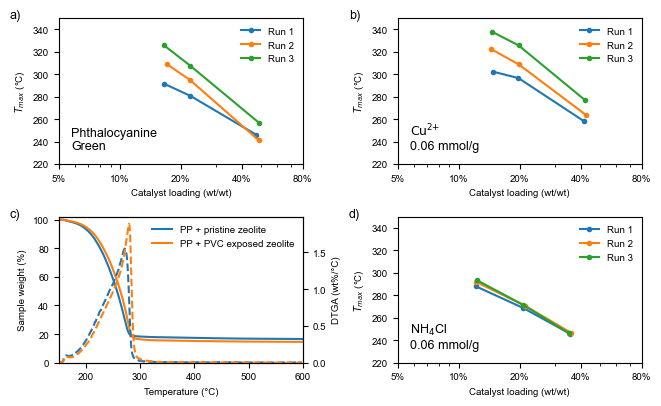

In [ ]:
#plotting consectutive experiments first, then PVC

sel_exp_nums = [10,11,9]

color_dict = {1: 'C0', 2: 'C1', 3: 'C2'}


fig, axs = plt.subplots(2, 2, figsize=(3.3*2,3.3/1.618*2))
for i, num in enumerate(sel_exp_nums):
    ax = axs[i//2,(i+2)%2]
    if i == 2:
        ax = axs[1,1]
    exp = tga_experiments[get_index_from_num(num, tga_experiments)]
    df = pd.read_csv(os.path.join(resultdir,'tga', 'Results_full_'+exp+'.csv'))
    for run in df['num_run'].unique():
        df_run = df[df['num_run'] == run]
        ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color=color_dict[run],label='Run ' + str(run))
    #Formatting
    ax.set_xscale('log')
    ax.set_ylim(220,350)
    ticks1 = [5,10,20,40,80]
    ax.legend(frameon=False)

    ax.set_xticks(ticks1)
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.set_xticklabels([str(x)+ '%' for x in ticks1])
    ax.set_xlabel('Catalyst loading (wt/wt)')
    ax.set_ylabel('$T_{max}$ (°C)')
    exp_num = int(exp.split('_')[0])
    ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'),
                xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)
# add a-d
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)



#plotting PVC
path_justPP = os.path.join(data_dir, 'tga', '020_NF_1_PP1-004_N_N_ZY', 'raw', '020_NF_1_PP1-004_N_N_ZY_1','020_NF_1_PP1-004_N_N_ZY_P_1_1.txt')
path_PVC_PP = os.path.join(data_dir, 'tga', '019_NF_1_PP1-004_N_N_S016ZY', 'raw','019_NF_1_PP1-004_N_N_ZY_1', '019_NF_1_PP1-004_N_N_ZY_S160101_1_1.txt')

just_PP = tga.parse_txt(path_justPP, exp_type='pyro',calculate_DTGA=True).cracking()
pvc_PP = tga.parse_txt(path_PVC_PP, exp_type='pyro',calculate_DTGA=True).cracking()

# test_path = 'C:/Users/Rejma001/OneDrive - Universiteit Utrecht/Students/Nasrin/data/tga/test/NF_TGA_001_Real waste p_001_0001.txt'
# test = tga.parse_txt(test_path, type='pyro',calculate_DTGA=True).cracking()
ax1 = axs[1,0]
ax2 = ax1.twinx()

ax1.plot(just_PP['Sample Temp.'],just_PP['rel_weight_twl']*100,label='PP + pristine zeolite',color='C0')
ax2.plot(just_PP['Sample Temp.'],just_PP['DTGA_twl']*100,color='C0', linestyle='dashed')
ax1.plot(pvc_PP['Sample Temp.'],pvc_PP['rel_weight_twl']*100,label='PP + PVC exposed zeolite',color='C1')
ax2.plot(pvc_PP['Sample Temp.'],pvc_PP['DTGA_twl']*100,color='C1', linestyle='dashed')

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Sample weight (%)')
ax2.set_ylabel('DTGA (wt%/°C)')
ax1.legend(frameon=False)

ax1.set_xlim(150,600)
ax1.set_ylim(0,102)
ax2.set_ylim(0,)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_Chlorine.svg'), transparent=True)
plt.show()

### Effect of Post-Consumer Plastic Waste on Catalytic Performance
After studying the effect of individual impurities spiked on a PP model sample, we extended our investigation to the effect of a PCPW sample on the deactivation of a zeolite US-Y catalyst material. Fig. 5a shows the T<sub>max</sub> value as a function of catalyst loading as seen in the prior experiments, but for the cracking of PCPW. It was found that the T<sub>max</sub> was largely unaffected by the catalyst loading and only increased slightly for run 2 and 3 at low zeolite loading. The reason for this behavior was described in earlier work: For high M<sub>w</sub> polymers, the T<sub>max</sub> value is dominated by the thermal degradation temperature of the polymer, as the high viscosity of the polymer prohibits it from contacting the catalytic material effectively during the TGA experiments.<sup>6</sup> This prohibits an effective assessment of catalyst deactivation.
To work around this inherent problem of the method employed, we have utilized the cracking of pristine low M<sub>w</sub> PP as a probe for deactivation. As before, PCPW was cracked using zeolite US-Y at three loadings. After these experiments, the same samples were used to crack pristine, low M<sub>w</sub> PP. When the T<sub>max</sub> in this experiment is compared to the cracking temperature of pristine PP on pristine zeolite (Fig. 5b) a clear increase resulting from deactivation can be seen. As expected, at lower catalyst loading, i.e., a higher impurity loading per gram of zeolite US-Y material, catalyst deactivation is more severe. Note that the datapoints are shifted to higher catalyst loadings. In the calculation of the catalyst loading, the final weight of the TGA pan after each experiment is taken as the weight of the catalyst. Therefore, as the solid content in the pan increases with increasing deposition of solids from the PCPW, the catalyst loading appears to increase.
To estimate a maximum tolerance for impurities, we furthermore conducted the same experiment at a single loading of ~16 wt% ten times. ~ 0.8 mg of zeolite was therefore used to crack a total of 50 mg PCPW over 10 runs. This led to an increase of ~60 °C for T<sub>max</sub> in the cracking of pristine PP, resulting in a required temperature of 350 °C, still significantly lower than 450 °C required for classical thermal pyrolysis. By comparison, estimates indicate that in the fluid catalytic cracking (FCC) process, approx. 0.16 kg of catalyst material are discarded per barrel of VGO. This estimated value translates to approx. 880 kg of VGO per kg of catalyst material. For the case of the PCPW discussed above, using the same unit translates to 62.5 kg of waste per kg of zeolite.
This comparison shows that zeolite materials might show a considerable capacity for impurities in PCPW conversion but will still deactivate significantly faster when used in the cracking of plastic waste rather than when VGO is used as carbon feedstock.

<img
  src="figures_annotated/Fig_5.svg"
  alt="Figure 5"
  style="background-color: white; display: block; margin: 0 auto;"
/>

**Fig. 5:** (a) Temperature of the fastest decomposition rate (Tmax) in the catalytic cracking of post-consumer plastic waste (PCPW) using ultrastable zeolite Y (US-Y) as a function of catalyst loading over three consecutive runs. Insert shows a photograph of the sample. (b) Cracking of pristine polypropylene (PP) on US-Y before and after cracking of PCPW thrice. (c) Thermograms for cracking of pristine PP using US-Y before and after cracking PCPW in ten consecutive runs. All weight loss profiles are shown in the supplementary information.

### Fig. 5 (code)

#### TGA

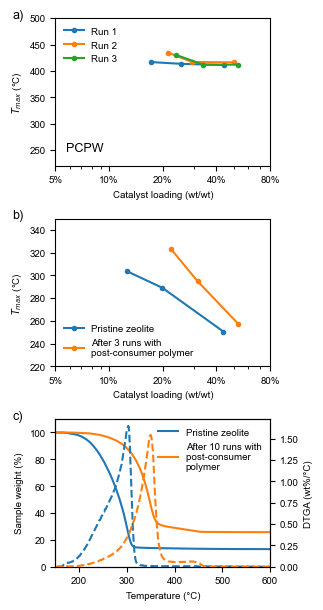

In [ ]:
tga_experiments = os.listdir(os.path.join(data_dir, 'tga'))
exp_labels = pd.read_csv('utils/TGA_exp_labels.csv',names=['experiment_number', 'label'])

color_dict = {1: 'C0', 2: 'C1', 3: 'C2'}

fig, axs = plt.subplots(3, 1, figsize=(3.3*1,3.3/1.618*3))

#a---------------------------------------
ax = axs[0]

exp = tga_experiments[get_index_from_num(24, tga_experiments)]

df = pd.read_csv(os.path.join(resultdir,'tga', 'Results_full_'+exp+'.csv'))
for run in df['num_run'].unique():
    df_run = df[df['num_run'] == run]
    ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color=color_dict[run],label='Run ' + str(run))

#Formatting
ax.set_xscale('log')
ax.set_ylim(220,500)
ticks1 = [5,10,20,40,80]
ax.legend(frameon=False)

ax.set_xticks(ticks1)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.set_xticklabels([str(x)+ '%' for x in ticks1])
ax.set_xlabel('Catalyst loading (wt/wt)')
ax.set_ylabel('$T_{max}$ (°C)')
exp_num = int(exp.split('_')[0])
ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'),
            xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)


#b---------------------------------------

ax = axs[1]
# for pristine zeolite
exp = tga_experiments[get_index_from_num(30, tga_experiments)]
df = pd.read_csv(os.path.join(resultdir,'tga', 'Results_full_'+exp+'.csv'))
run = 1
df_run = df[df['num_run'] == run]
ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color=color_dict[run],label='Pristine zeolite')


# after runs with contaminated polymer
exp = tga_experiments[get_index_from_num(25, tga_experiments)]
df = pd.read_csv(os.path.join(resultdir,'tga', 'Results_full_'+exp+'.csv'))
run = 1
df_run = df[df['num_run'] == run]
ax.plot(df_run['cat_weight']/df_run['polymer_weight']*100,df_run['Tmax'],'o-',markersize=3, color='C1',label='After 3 runs with\npost-consumer polymer')

#Formatting
ax.set_xscale('log')
ax.set_ylim(220,350)
ticks1 = [5,10,20,40,80]
ax.legend(frameon=False)

ax.set_xticks(ticks1)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.set_xticklabels([str(x)+ '%' for x in ticks1])
ax.set_xlabel('Catalyst loading (wt/wt)')
ax.set_ylabel('$T_{max}$ (°C)')
exp_num = int(exp.split('_')[0])
# ax.annotate(exp_labels.loc[exp_labels['experiment_number'] == exp_num, 'label'].values[0].replace('\\n','\n'),
#             xy=(0.05, 0.1), xycoords='axes fraction', ha='left', fontsize=9)


#c---------------------------------------
path_justPP = os.path.join(data_dir, 'tga', '026_NF_1_PP1-004_N_N_ZY', 'raw', '026_NF_1_PP1-004_N_N_ZY_1','026_NF_1_PP1-004_N_N_ZY_1_1.txt')
path_post_consumer_PP = os.path.join(data_dir, 'tga', '028_NF_1_PP1-004_All_HL_S027ZY', 'raw','028_NF_1_PP1-004_All_HL_S027ZY_1', '028_NF_1_PP1-004_All_HL_ZY_S270901_1_11.txt')

just_PP = tga.parse_txt(path_justPP, exp_type='pyro',calculate_DTGA=True).cracking()
pvc_PP = tga.parse_txt(path_post_consumer_PP, exp_type='pyro',calculate_DTGA=True).cracking()

# test_path = 'C:/Users/Rejma001/OneDrive - Universiteit Utrecht/Students/Nasrin/data/tga/test/NF_TGA_001_Real waste p_001_0001.txt'
# test = tga.parse_txt(test_path, type='pyro',calculate_DTGA=True).cracking()
ax1 = axs[2]
ax2 = ax1.twinx()

ax1.plot(just_PP['Sample Temp.'],just_PP['rel_weight_twl']*100,label='Pristine zeolite',color='C0')
ax2.plot(just_PP['Sample Temp.'],just_PP['DTGA_twl']*100,color='C0', linestyle='dashed')
ax1.plot(pvc_PP['Sample Temp.'],pvc_PP['rel_weight_twl']*100,label='After 10 runs with\npost-consumer \npolymer',color='C1')
ax2.plot(pvc_PP['Sample Temp.'],pvc_PP['DTGA_twl']*100,color='C1', linestyle='dashed')

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Sample weight (%)')
ax2.set_ylabel('DTGA (wt%/°C)')
ax1.legend(frameon=False)

ax1.set_xlim(150,600)
ax1.set_ylim(0,110)
ax2.set_ylim(0,)


for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_Post_consumer.svg'), transparent=True)
plt.show()

#### SI: Characterization of PCPW

Thermal degradation temperature PCPW 471.92 °C
Solid content of PCPW: 5.38%


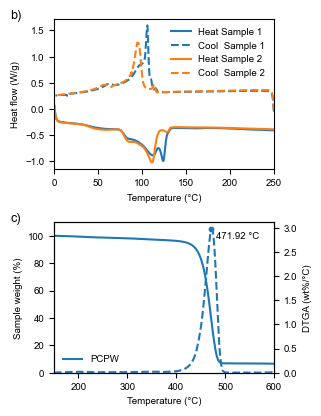

In [ ]:
# TGA
path_PCPW_thermal = os.path.join(data_dir, 'tga', '023_NF_1_RPW_All_HL_N', 'raw', '023_NF_1_RPW_All_HL_N_1','023_NF_1_RPW_All_HL_N_1_1.txt')

PCPW_thermal = tga.parse_txt(path_PCPW_thermal, exp_type='pyro',calculate_DTGA=True).cracking()
PCPW_burnoff = tga.parse_txt(path_PCPW_thermal, exp_type='pyro',calculate_DTGA=True).burnoff()


fig, axs = plt.subplots(3, 1, figsize=(3.3,3.3/1.618*3))
ax1 = axs[2]
ax2 = ax1.twinx()
ax1.plot(PCPW_thermal['Sample Temp.'],PCPW_thermal['rel_weight_twl']*100,label='PCPW',color='C0')
ax2.plot(PCPW_thermal['Sample Temp.'],PCPW_thermal['DTGA_twl']*100,color='C0', linestyle='dashed')

#tmax
print('Thermal degradation temperature PCPW {} °C'.format(tga.calc_Tmax(PCPW_thermal)))
print('Solid content of PCPW: {}%'.format(np.round(PCPW_burnoff['Unsubtracted weight'].iloc[-1]/PCPW_thermal['Unsubtracted weight'].iloc[0],4)*100))
ax2.scatter(tga.calc_Tmax(PCPW_thermal), PCPW_thermal['DTGA_twl'].max()*100, color='C0', s= 10)
ax1.annotate('{} °C'.format(tga.calc_Tmax(PCPW_thermal)), xy=(tga.calc_Tmax(PCPW_thermal)+10, 98),  fontsize=7)

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Sample weight (%)')
ax2.set_ylabel('DTGA (wt%/°C)')
ax1.legend(frameon=False, loc= 'lower left')

ax1.set_xlim(150,600)
ax1.set_ylim(0,110)
ax2.set_ylim(0,)


# DSC
dir_DSC = os.path.join(data_dir, 'DSC')
DSC_files = os.listdir(dir_DSC)

ax = axs[1]
colors = ['C0','C1']
for file in enumerate(DSC_files):
    heat_1 = pd.read_excel(os.path.join(dir_DSC, file[1]),sheet_name='Ramp 10.00 °Cmin to 250.00 °C', skiprows=2,)
    ax.plot(heat_1['°C'], heat_1['W/g'],  label= 'Heat Sample '+str(file[0]+1), color=colors[file[0]])
    cool_1 = pd.read_excel(os.path.join(dir_DSC, file[1]),sheet_name='Ramp 10.00 °Cmin to 0.00 °C', skiprows=2)
    ax.plot(cool_1['°C'], cool_1['W/g'], label= 'Cool  Sample '+str(file[0]+1), color=colors[file[0]], linestyle='dashed')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Heat flow (W/g)')
ax.legend(frameon=False)
ax.set_xlim(0,250)

#remove plot 0
axs[0].remove()
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.2, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)


plt.tight_layout()
plt.savefig(os.path.join(figdir, 'PCPW_char.svg'), transparent=True)
plt.show()

### Effect of Individual Impurities on Reaction Selectivity

To assess the effect of individual impurities on reaction selectivity, the PP model sample spiked with various impurities (Na, Ca, SiO<sub>2</sub>, and TiO<sub>2</sub>) was cracked using zeolite US-Y as a catalyst in a semi-batch reactor analogously to the experiments, described in earlier work.<sup>9</sup> The reactor temperature was raised at 10 °C/min to 450 °C under N<sub>2</sub> atmosphere. Liquid products were collected in two ice-water cooled cold traps and analyzed by two-dimensional gas chromatography (GCxGC) in combination with flame ionization detection (FID) and mass spectrometry (MS). Gaseous products were analyzed using on-line GC, while coke yields were determined by TGA of spent catalyst material. Fig. 6a shows the carbon flow over the course of the experiment. The onset and amount of gaseous hydrocarbon product formation was almost identical for all PP model samples, showing that the zeolite US-Y activity is not significantly affected during initial exposure to the various impurities studied. Similarly, the reaction selectivity was not really affected, as can be seen from Fig. 6b, which shows the cumulative yield of product categories analyzed. The yields and distributions of gaseous hydrocarbon products labeled by carbon number were almost identical, so were the compositions of the liquids, and coke yields. The mass balance for these experiments ranges from 72%-90%, with major differences mainly in the liquid yield, which was determined by weighing of cold traps. As discussed previously,<sup>6,9</sup> the deviations from 100% can be explained by restricted time resolution of the on-line GC as well as liquid condensing in the cold sections of the autoclave. We expect that more significant differences in selectivity could be observed with consecutive cracking runs, as implemented for the TGA experiments. In particular, we expect that increased the level of alkali metal contamination will result in decreased gas formation and coke formation due to the poisoning of acid sites present in the zeolite US-Y catalyst material.

### Fate of Impurities
As introduced earlier, the impurity content of pyoils is another core parameter determining their quality. We hypothesized that zeolite materials could play a dual role in the plastic cracking process: They lower the reaction temperature, but could also act as an in-situ absorbent of impurities, yielding a cleaner pyoil. To test this hypothesis, elemental analysis of the zeolite US-Y material and pyoils obtained by cracking of PP model samples spiked with impurities as well as PCPW using the semi-batch approach was conducted. Fig. 6c,d shows mass balances by element determined for PP model samples spiked with various impurities (i.e., Na, Ca, TiO<sub>2</sub>, S, and Cl) (Fig. 6c) as well as the PCPW sample (Fig. 6d). For the former polymer samples, the expected amount of each impurity was determined from the amount introduced during the deposition procedure, while for the latter sample, the elemental analysis of PCPW was used.


It was found that for the PP model samples, the mass balance is almost closed for Ca and Na as impurities, with the majority of both chemical elements remaining on the zeolite material. This finding is in line with the observed poisoning of BAS and the introduction of LAS. The concentrations of all studied impurities in the liquid were below the limit of quantification. For TiO<sub>2</sub>, it was found that the mass balance is below 60%. We expect that part of the material was carried as particles into the condensers, rather than being deposited on zeolite US-Y. Very little of the S deposited in the form of ammonium sulfate was found on the zeolite or in the liquid. Ammonium sulfate decomposes at temperatures above 250 °C into a variety of products including gaseous SO<sub>2</sub> and SO<sub>3</sub>.<sup>32</sup> Therefore, it is not surprising that the sulfur concentration on the zeolite material and in the liquid is rather low. We note that no analysis of the gases for the semi-batch cracking of the S-spiked PP model sample as well as the PCPW sample was conducted to avoid damaging the GC system used in this study. For the PCPW sample, the mass balance for all chemical elements except for TiO<sub>2</sub> exceeded 100%. We believe the core reason can be found in the inhomogeneity of the PCPW sample. As can be noted from Fig. S1, the waste material consists of highly varying grains. Elemental analysis on a small sample is most likely an imperfect description of the mean impurity content, and we expect a more accurate mass balance to be lower. Nevertheless, together with the insight from the PP model samples spiked with various impurities, we reason that the majority of alkali metals, earth alkali metals, and oxides, like TiO<sub>2</sub>, will remain on the catalyst.
A large quantity of S was found on the zeolite material for the PCPW sample, in contrast to the PP model sample contaminated with ammonium sulfate. This indicates that the sulfur impurities present in the PCPW sample themselves or their decomposition products are stable above 400 °C, e.g. CaSO<sub>4</sub>. For Cl, very little mass was retained on the zeolite material, while the majority of Cl was found in the liquid. These experiments show that zeolite US-Y can serve as an in-situ adsorbent for metal ions and metal oxides, such as Na, Ca, TiO<sub>2</sub>, and stable sulfates, but unfortunately not for Cl, which also explains the observed limited poisoning effects of Cl on the zeolite. Elemental analysis further revealed a significant increase in a large variety of other elements on the US-Y after cracking PCPW (Table S2). For example, Ba, Ca, Cr, Cu, Fe, K, Mg, Na, P, Pb and Zn were found in concentrations exceeding 100 ppm.
To investigate the distribution of the impurities on the US-Y after cracking of PCPW, STEM-EDX was conducted (Fig. 6 e,f). Ti was found mainly in the form of particles, as observed for pristine PP spiked with TiO<sub>2</sub>. Ca and S showed a more homogenous distribution throughout the sample. For certain US-Y particles, Ca and S appear to occur together (Fig. 6e'), suggesting the presence of e.g. CaSO<sub>4</sub>. For other particles, Ca showed a more concentrated distribution, which might originate from CaCO<sub>3</sub> (Fig. 6f).


<img
  src="figures_annotated/Fig_6.svg"
  alt="Figure 6"
  style="background-color: white; display: block; margin: 0 auto;"
/>

**Fig. 6:** Cracking of a polypropylene (PP) model sample as such and PP model samples, which is spiked with various impurities (i.e., Na, Ca, SiO<sub>2</sub>, and TiO<sub>2</sub>) using ultrastable zeolite Y (US-Y) as catalyst in a semi-batch reactor. (a) Carbon flow over the course of the experiment as determined by on-line gas chromatography (GC). (b) Overall product distribution, including alkanes, alkenes and aromatics. Gaseous hydrocarbon products are shown grouped by carbon number. Liquid hydrocarbon products were analyzed by two-dimensional gas chromatography (GCxGC) with flame ionization detection (FID) and mass spectrometry (MS). 2D chromatograms can be found in the supplementary information (Fig. S9). The coke yield was determined by thermogravimetric analysis (TGA) of the spent zeolite material.(c,d) Mass balance of impurities determined by elemental analysis for the ultrastable zeolite Y (US-Y) material catalyzing the semi-batch cracking of (c) low molecular weight (M<sub>w</sub>) polypropylene (PP) model samples spiked with various impurities (i.e., Na, Ca, TiO<sub>2</sub>, S, and Cl), (d) a post-consumer plastic waste (PCPW) sample. (e, e’, f) Scanning transmission electron microscopy (STEM) using high-angle annular dark-field (HAADF) imaging with energy dispersive X-ray (EDX) elemental mapping for US-Y used in the catalytic cracking of PCPW.

### Fig. 6 (code)

#### Selectivity

No TGA file found for data\semi_batch_reactor/004_NF_5_PP1-004_N_none_ZY/


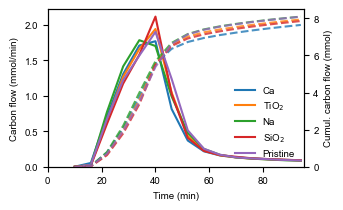

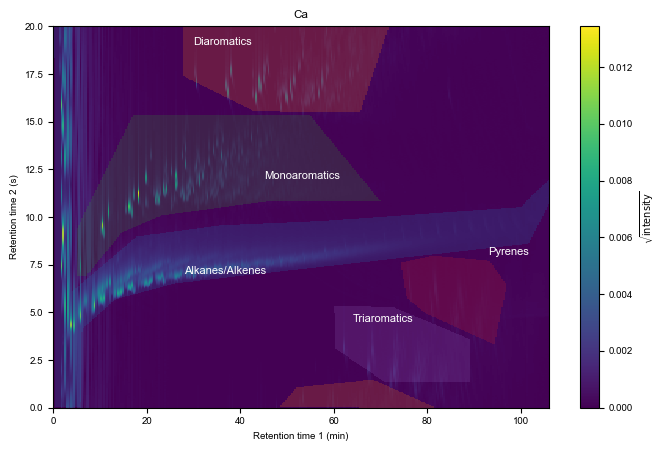

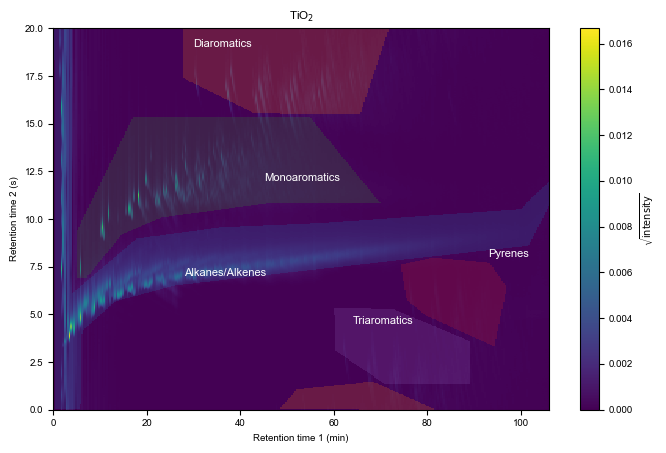

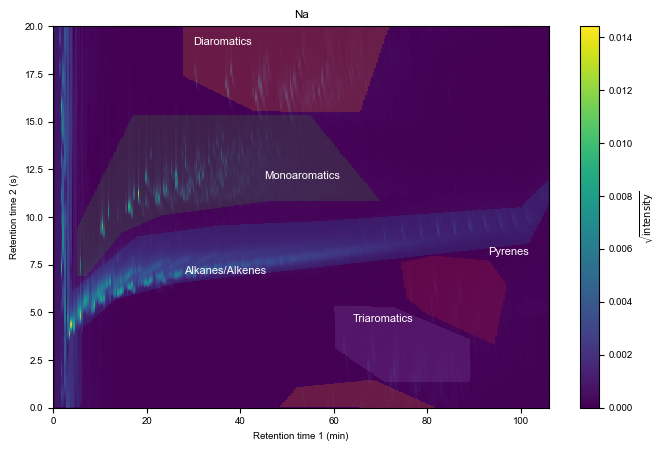

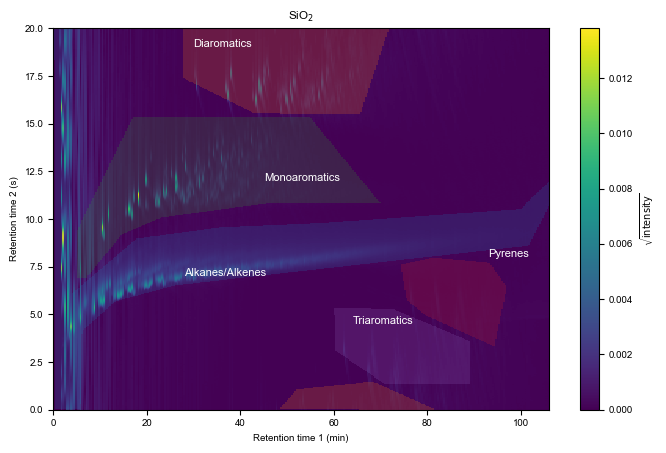

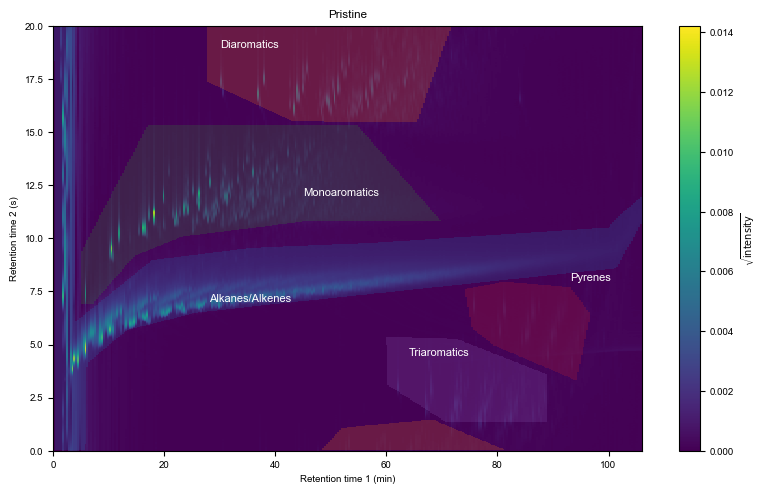

In [ ]:
process_2D_Chromatogram = True
#importing 2D chromatogram functions, if needed
# if process_2D_Chromatogram:
#     sys.path.insert(0, 'C:/Users/Rejma001/surfdrive2/python_projects/gcxgc-ms-fid')
#     # from gcgc_utils import *


import utils.pyGCMS.utils as ogc

if process_2D_Chromatogram:
    import utils.pyGCMS.gcgc_utils as gcgc
    mask_dir = 'utils/pyGCMS/Masks_GCxGC/'
plot_2Dchromatogram = True

filedir = os.path.join(data_dir, 'semi_batch_reactor')


all_rundirs = os.listdir(filedir)
multiselector = [3,4,0,1,2]

filepaths = [filedir +'/'+ all_rundirs[multiselector[i]] +'/' for i in range(len(multiselector))]
filenames = [all_rundirs[multiselector[i]] for i in range(len(multiselector))]
masslist = []
catalysts = []
impuritites = []
liquid_masslist = []
TCD_masslist = []
TCD_framelist = []
export_list = []
Chromatograms_2D = []
fig, ax = plt.subplots(figsize =(3.3,3.3/1.612))
ax2 = ax.twinx()
for i in range(len(filepaths)):
    meta_frame = ogc.get_meta(filepaths[i])
    catalyst = meta_frame['value']['Catalyst type:']
    impurity = meta_frame['value']['Sample code:']

    calib_factors = ogc.get_calib_factors(meta_frame) # first row is ignored!
    init = float(meta_frame['value']['GC start time:'])  # start time of filling the loops (min)
    inj_time = float(meta_frame['value']['Time sampling loop: [min]']) # time of recording of 1 injection in min
    inj_time_timelist = [init + inj_time*i for i in range(0,15)] # 14 sample loops in total. There is a big annoyance here, because we ignore the first loop. In some parts of the script this requires to use this array starting with the second element (that is, the '1')

    #reading and processing TCD flows from the chromatograms
    compound_frame_TCD = pd.read_csv(filepaths[i]+'Peaklist_TCD.csv',index_col=0)
    flow_frame_TCD = ogc.get_TCD_flows(filepaths[i],compound_frame_TCD)
    flow_frame_TCD['Hydrogen'].iloc[1] = 0
    TCD_framelist.append(flow_frame_TCD)
    total_masses_TCD = ogc.get_TCD_masses(flow_frame_TCD[['Propane', 'Propylene','Hydrogen']], inj_time_timelist)

    #reading the FID chromatograms
    filelist_FID = glob.glob(filepaths[i]+'*FID_right*')
    filelist_FID.sort(key=len) # requiered, otherwise the injection number will start with no 10 and not 1
    filelist_FID = filelist_FID[1:]

    #processing the FID chromatograms
    integral_frame_FID = ogc.get_integral_frame(filelist_FID, filepaths[i]+'Peaklist.csv', inj_time_timelist[1:]) # the integral here is in pA*s
    integral_frame_FID_mol = ogc.calc_molarCflow(integral_frame_FID, calib_factors, flow_frame_TCD)
    total_masses_indiv = ogc.get_indiv_integrals(integral_frame_FID_mol,inj_time_timelist)

    #obtaining the amount of coke from the TGA file
    if 'none' in catalyst:
        total_coke = 0
    else:
        total_coke = ogc.get_coke_amount(filepaths[i],float(meta_frame['value']['Mass of catalyst: [g]']))
    if type(total_coke) != float:
        total_coke = 0
    #mass of liquid form the meta file
    mass_liquid =  float(meta_frame['value']['Mass of liquid sample: [g]'])

    #getting the liquid slectivities from the GCxGC chromatogram
    if process_2D_Chromatogram:
        GCxGCpath = glob.glob(filepaths[i]+'*GCxGC*'+'/'+'*.csv')[0]
        liquid_selectivities,chromatogram_gcgc = gcgc.process_chromatogram(GCxGCpath, 20, 4, mask_dir)
        Chromatograms_2D.append(chromatogram_gcgc)

    labeldict = {'Py_PP_Z03B':'Pristine','Py_PP_Na_Z03B':'Na', 'MgCL2':'Mg', 'Py_PP_Ca_Z03B':'Ca', 'Ti':'TiO$_2$', 'Py_PP_Si_Z03B':'SiO$_2$'}

    if plot_2Dchromatogram:
        gcgc.plot_2Dchromatogram(chromatogram_gcgc,mask_dir,figdir_SI+'/'+impurity+'_2Dchromatogram.png',title=labeldict[impurity])


    extra_frame = pd.DataFrame(data = [mass_liquid, total_coke], index=['liquid','coke'], columns=['mass']) # just adds the mass of the liquid and the coke to the mass frame
    masses_export = pd.concat([total_masses_indiv, total_masses_TCD,extra_frame], axis=1)

    masslist.append(total_masses_indiv['mass'].loc['total'])
    liquid_masslist.append(ogc.get_liquid_yield(meta_frame))
    export = ogc.flatten_export(masses_export,catalyst)

    # calculating liquid mass yields
    if process_2D_Chromatogram:
        for j in liquid_selectivities.columns.values.tolist():
            export[j] = export['liquid'].iloc[0]*liquid_selectivities[j][0]

    export_list.append(export)

    TCD_masslist.append(masses_export)

    #saving propylene selectivity to to db
    Propylene_selectivity = masses_export['mass_TCD'].loc['Propylene']/2.5
    # dbq.write_db(catalyst,'Propylene_semibatch',Propylene_selectivity)

    ax.plot(inj_time_timelist,integral_frame_FID_mol.loc['total'], label = labeldict[impurity])#label=filenames[i] + ' ' + catalyst
    ax2.plot(inj_time_timelist,integral_frame_FID_mol.cumsum(axis=1).loc['total'],alpha=0.8, linestyle='--')#color=db['plotcolor'].loc[catalyst]

    catalysts.append(catalyst)
    impuritites.append(labeldict[impurity])


ax.legend(loc='lower right',frameon=False, ncols=1)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Carbon flow (mmol/min)')
ax2.set_ylabel('Cumul. carbon flow (mmol)')
ax.set_xlim(0, 95)
ax.set_ylim(0,)
ax2.set_ylim(0,)
plt.tight_layout()

plt.savefig(figdir + '/carbon_flow.svg', bbox_inches='tight',transparent=True)

#### Mass balances

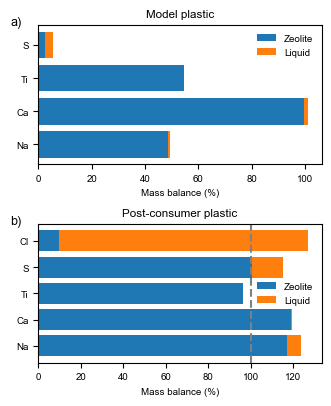

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(3.3,3.3/1.618*2))

ax = axs[0]
data_model = pd.read_excel(os.path.join(data_dir, 'Sample_preparation_massbalance.xlsx'),sheet_name='MB_model_samples') # MB_PC
names = data_model['Sample']
mb_zeolite = data_model['mass balance zeolite']*100
mb_liquid = data_model['mass balance liquid']*100

ax.barh(names, mb_zeolite, label='Zeolite')
ax.barh(names, mb_liquid, left=mb_zeolite, label='Liquid')
ax.legend(frameon=False)
ax.set_xlabel('Mass balance (%)')
ax.title.set_text('Model plastic')
# Add labels and title

ax = axs[1]
data_model = pd.read_excel(os.path.join(data_dir, 'Sample_preparation_massbalance.xlsx'),sheet_name='MB_PC')
names = data_model['Sample']
mb_zeolite = data_model['mass balance zeolite']*100
mb_liquid = data_model['mass balance liquid']*100

ax.barh(names, mb_zeolite, label='Zeolite')
ax.barh(names, mb_liquid, left=mb_zeolite, label='Liquid')
ax.legend(frameon=False)
ax.set_xlabel('Mass balance (%)')
ax.axvline(100, color='grey', linestyle='dashed', ymin=0, ymax=1)
ax.title.set_text('Post-consumer plastic')
#adda and b)
for i, ax in enumerate(axs.flatten()):
    ax.text(-0.1, 1.0, chr(97+i)+')', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(figdir, 'Fig_mass_balance.svg'), transparent=True)

## Conclusions
In this work we provide, to the best of our knowledge, the first systematic account on the deactivating effects of various impurities (i.e., Na, K, Ca, Mg, TiO<sub>2</sub>, SiO<sub>2</sub>, Cu, S, and Cl) in the cracking of post-consumer plastic waste (PCPW) using ultrastable zeolite Y (US-Y) as catalyst material and polypropylene (PP) as model system.
Our findings indicate that typical zeolite poisons encountered in crude oil cracking, like alkali metals (i.e., Na and K), are most detrimental to cracking activity of plastic waste even at low concentrations. For other impurities, including earth alkali metals (Ca and Mg) and metal oxides (SiO<sub>2</sub> and TiO<sub>2</sub>), zeolite US-Y shows a noticably higher tolerance. Washing of PCPW to remove as much as possible alkali metals, like Na originating from NaCl salts, might therefore be a viable pre-treatment before cracking. For metal oxides (e.g., TiO<sub>2</sub>) that at high loadings lead to pore blockage, methods like hot filtration might extend the lifetime of the catalytic material. As metal impurities remain largely on the zeolite, we expect that catalytic cracking will yield cleaner pyrolysis oils as compared to thermal pyrolysis. However, catalytic cracking cannot help with other impurities (e.g., Cl and S) under study. Hydrotreating of the resulting pyrolysis oils before further use for example in steam cracking might remain a requirement to remove S impurities. Even though Cu showed comparable deactivation effects as Na, it should be of lesser concern for a plastic cracking process, as the Cu concentrations in PCPW studied herein were determined to be < 30 ppm.
Furthermore, we have defined a first estimate of the impurity capacity of zeolite US-Y. While significant activity remained after processing a 60-fold excess in PCPW by weight, placing this finding in an industrial context is challenging. With the process only beginning to enter commercialization, it is unclear what level of activity and impurity capacity will be required to offset the cost of the catalyst material to be added to a reactor setup. Future research should be directed towards this and include reactor process engineers in the assessment of existing as well as new zeolite-based catalyst formulations.


## Materials and Methods

### Materials
Pristine PP (M<sub>w</sub> = 32,500 g/mol) was supplied by Sanyo chemicals under the name Viscol V330P. Additional characterization of this sample can be found in our prior work.<sup>6</sup> A mixed PCPW sample derived from polyolefin films separated from Dutch municipal waste as sorting fraction DKR 310 was provided by TNO in treated form.
The treatment involves a proprietary hydrothermal process<sup>19</sup> at 220 °C. This procedure separates the polyolefins from, for example, polyvinyl chloride (PVC) and polyesters (PE). As can be seen from a photograph of the sample (Fig. S1a), it is highly heterogenous in nature. This can also be noted when the differential scanning calorimetry (DSC, measured at 10 °C/min using a Mettler Toledo DSC 3 STARe system) thermograms of two different grains of the sample are compared (Fig. S1b). The samples showed multiple melting peaks in different ratios, most likely due to different concentrations of PP and polyethylene (PE). Thermogravimetric analysis (TGA) of the PCWP under study showed a decomposition temperature of 472 °C at 5 °C/min (Fig. S1c), and a solid content of 5%, determined by TGA as the final weight after their burn-off at 800 °C.
Zeolite US-Y, the catalyst material studied in this work, was obtained from Zeolyst under the trade name CBV780. The same sample was used in our prior work under the label ZY55, where additional characterization can be found.<sup>9</sup>
The following chemical compounds were used as contaminants to spike the PP material: Sodium acetate (anhydrous, reagent grade, Fisher Scientific), Potassium acetate (>97%, TCI), Magnesium chloride hexahydrate (99%, Fisher Scientific), Calcium stearate (6.6-7.4% Ca basis, Sigma Aldrich), Phthalocyanine Green 7 (>98%, TCI), PVC (low molecular weight, Sigma Aldrich), Ammonium chloride (p.a., Fisher Scientific), Ammonium sulfate (99.5%, Fischer Scientific), Fumed Silica (Sigma Aldrich), TiO<sub>2</sub> (99.5%, Sigma Aldrich) and copper acetate hydrate (98%, Sigma Aldrich).

### Preparation of Model Contaminated Plastic
The procedure for the preparation of PP model systems contaminated with various impurities is schematically shown in Fig. S2. An impurity compound, as specified in Table S1, was dissolved or dispersed in ethanol or DCM as solvent in the appropriate amount to reach the target molar concentration (Table S1) and mixed with 3 g of the pristine PP powder in a round bottom flask. The solvent was then removed using a rotary evaporator. Successful deposition of the target amount of the impurities was verified for the Na PP model system as follows: The conductivity of a set of aqueous sodium acetate solutions of known concentration was determined to obtain a calibration curve. A sample of the polymer was extracted with water, and the conductivity of the resulting solution determined. Using the calibration curve, the concentration of sodium acetate in the extracted solution was determined. From this, the amount of sodium acetate deposited on the PP sample could be verified.

### Thermogravimetric Analysis
Thermogravimetric analysis (TGA) experiments were conducted analogously to the ones described in prior work<sup>6,9</sup> using a Perkin Elmer TGA 8000 instrument. In short, zeolite material was loaded into a ceramic TGA crucible, and polymer was added on top. Under 45 ml/min N<sub>2</sub> flow, the temperature was first raised to 130 °C at 5 °C/min and held for 20 min, then raised to 600 °C at 5 °C/min. After cooling to 50 °C, the atmosphere was switched to O<sub>2</sub> atmosphere, and the sample heated to 800 °C at 20 °C/min to burn off coke deposits. The mass of the catalytic material was determined as the final weight of the measurement. In a set of consecutive measurements, the catalytic material was left in the pan. Note that by this processing the apparent catalyst mass increases with consecutive measurements when a significant amount of solid is deposited. TGA data processing made use of the pyTGA python library.<sup>25</sup> In Figures S3-S6, the measured TGA profiles of the different measurements for the different polypropylene (PP) model samples, spiked with different impurities, as well as the post-consumer plastic waste (PCPW) sample under study, are summarized.

### Semi Batch Reactor Experiments
Semi-batch reactor experiments were conducted as described in prior work.<sup>9</sup> In brief, zeolite catalyst (0.625 g) and polymer (2.5 g) were added to an autoclave reactor and heated to 450 °C at 10 °C/min using a calibrated power profile. The temperature was consecutively held for 1 h. Liquid products were caught in two cold traps containing ice water and analyzed by two dimensional gas chromatography (GCxGC) using Flame ionization (FID) and mass spectrometry (MS) detectors. 2D chromatograms are depicted in Fig. S9. Gaseous products were analyzed using on-line GC, coke content was determined by TGA of spent catalyst material.


### Elemental Analysis
Elemental analysis of zeolites with the exemption of chlorine was measured by inductively coupled plasma-optical emission spectroscopy (ICP-OES) at the Faculty of Geoscience, Utrecht University. 125 mg of each zeolite sample was digested in a Teflon vessel using 2.5 mL of mixed acid (HClO<sub>4</sub>:HNO<sub>3</sub> = 3:2) and 2.5 mL HF at 90 °C overnight. HF was removed at 140 °C. The resulting gel was dissolved in 25 mL of a 4.5% HNO<sub>3</sub>. Measurements were conducted using a Perkin-Elmer Avio 500 ICP-OES using radial plasma. Elemental analysis of the PCPW, pyrolysis oils and chlorine content of one zeolite after cracking of PCPW was measured by TNO. Metals were analyzed by using the ICP-OES method, while the chlorine content was determined by ion chromatography.

### Zeolite Characterization
After cracking of the PP model system, spiked with various impurities (i.e., Na, K, Ca, Mg, SiO<sub>2</sub>, TiO<sub>2</sub>, Cu, S, and Cl), using a semi-batch reactor, the coked zeolite material remaining in the autoclave was calcined at 550 °C for 2 h to remove coke species. The acid site densities of these zeolite materials were determined by Py-IR spectroscopy at 150 °C under high vacuum as described in earlier work.<sup>9</sup> extinction coefficients of  1.54 ± 0.15 cm/µmol and 1.74 ± 0.1 cm/µmol of the ring vibrations located at 1544 cm<sup>−1</sup> of the protonated pyridine and Lewis acid-coordinated pyridine located at 1455 cm<sup>−1</sup>, respectively were used.<sup>26</sup> Fig. S7 shows the corresponding IR spectra utilized for acid site quantification. The data for the pristine zeolite material are adapted from Ref.<sup>27</sup>
Total pore volumes for the selected samples were determined from the adsorbed volume at p/p<sub>0</sub> = 0.99 in N<sub>2</sub> physisorption using a 3P Sync 400 instrument. Micropore volumes were determined using the t-plot method using a hybrid t-curve from Ref.<sup>28</sup> as implemented in the python library pyGAPS.<sup>29</sup> The corresponding isotherms are depicted in Fig. S8.
Zeolites used for cracking of TiO<sub>2</sub> spiked model PP and PCPW were furthermore analyzed by scanning transmission electron microscopy (STEM) using a Talos F200X (Thermo Fisher Scientific) operated at 200 kV with energy dispersive X-ray (EDX, Super-X<sup>TM</sup> detector) for elemental mapping at a dwell time of 10 µs and a screen current of 1.38 nA.


## Author contributions
S. R. conceptualized the specific research in close consultation with I.V. and B.M.W., conducted data analysis, wrote the initial draft and developed the accompanying Jupyter Notebook. N.F. conducted the experiments and contributed to data analysis and discussion. I.V. and B.M.W. participated in the discussion of the experiments and related results. B.M.W. and I.V. conceived the overall project. B.M.W. acquired the necessary funding.

## Acknowledgements
B. M. W. is supported by the Netherlands Organization for Scientific Research (NWO) in the frame of a Gravitation Program, MCEC (Netherlands Center for Multiscale Catalytic Energy Conversion). B.M.W. and I.V. are supported by the Advanced Research Center (ARC) Chemical Buildings Blocks Consortium (CBBC), a public-private research consortium in the Netherlands (https://arc-cbbc.nl). This project was conducted in cooperation with TNO, as part of Brightsite. We thank Rinke Altink (TNO), Mark Roelands (TNO), Jacopo de Bellis (TNO) and Eelco Vogt (Utrecht University, UU) for helpful discussions. Mies van Steenbergen (UU) is thanked for providing DSC analysis. Vaishnavi Ganesh (UU) is acknowledged for conducting electron microscopy.

## Competing Interests Statement
The authors declare no competing interests.


## References
1.	Levi, P. G. & Cullen, J. M. Mapping Global Flows of Chemicals: From Fossil Fuel Feedstocks to Chemical Products. Environ. Sci. Technol. 52, 1725–1734 (2018).
2.	Vollmer, I. et al. Beyond Mechanical Recycling: Giving New Life to Plastic Waste. Angew. Chem. Int. Ed. 59, 15402–15423 (2020).
3.	Vogt, E. T. C. & Weckhuysen, B. M. The refinery of the future. Nature 629, 295–306 (2024).
4.	Ragaert, K., Delva, L. & Van Geem, K. Mechanical and chemical recycling of solid plastic waste. Waste Manag. 69, 24–58 (2017).
5.	Strohm, J., Rainer, D., Oyola-Rivera, O. & Avery, C. FCC co-processing of biogenic and recyclable feedstocks: Part I. Digital Refining (2024).
6.	Rejman, S. et al. Transport limitations in polyolefin cracking at the single catalyst particle level. Chem. Sci. 14, 10068–10080 (2023).
7.	Marcilla, A., Gómez, A., Reyes-Labarta, J. A., Giner, A. & Hernández, F. Kinetic study of polypropylene pyrolysis using ZSM-5 and an equilibrium fluid catalytic cracking catalyst. J. Anal. Appl. Pyrolysis 68–69, 467–480 (2003).
8.	Vollmer, I., Jenks, M. J. F., Mayorga González, R., Meirer, F. & Weckhuysen, B. M. Plastic Waste Conversion over a Refinery Waste Catalyst. Angew. Chem. Int. Ed. 60, 16101–16108 (2021).
9.	Rejman, S. et al. External acidity as performance descriptor in polyolefin cracking using zeolite-based materials. Nat. Commun. 16, 2980 (2025).
10.	Marcilla, A., Beltrán, M. I., Hernández, F. & Navarro, R. HZSM5 and HUSY deactivation during the catalytic pyrolysis of polyethylene. Appl. Catal. Gen. 278, 37–43 (2004).
11.	Brita, D. et al. Plastic depolymerization using halloysite. (2022) Patent No. US11319424B2.
12.	Coumans, F., Mezari, B., Zuidema, N., Heinrichs, J. M. J. J. & Hensen, E. J. M. Isolating Al Surface Sites in Amorphous Silica–Alumina by Homogeneous Deposition of Al3+ on SiO2 Nanoparticles. ACS Appl. Nano Mater. 7, 25524–25534 (2024).
13.	LyondellBasell to Build Industrial-scale Advanced Recycling Plant in Germany. https://www.lyondellbasell.com/en/news-events/corporate--financial-news/lyondellbasell-to-build-industrial-scale-advanced-recycling-plant-in-germany/ (2023).
14.	Jerdy, A. C. et al. Impact of the presence of common polymer additives in thermal and catalytic polyethylene decomposition. Appl. Catal. B Environ. 325, 122348 (2023).
15.	Ngu, J. et al. Catalytic deconstruction of organic additive-containing plastics. Nat. Chem. Eng. 1–9 (2025) doi:10.1038/s44286-025-00187-w.
16.	Vogt, E. T. C. & Weckhuysen, B. M. Fluid catalytic cracking: recent developments on the grand old lady of zeolite catalysis. Chem. Soc. Rev. 44, 7342–7370 (2015).
17.	Contreras, R. O., Leirós, M. B., Olong, N. & Brandt, S. Co-processing of chemical recycling products in FCC units. Digital Refining (2025).
18.	Sadeghbeigi, R. Fluid Catalytic Cracking Handbook: An Expert Guide to the Practical Operation, Design, and Optimization of FCC Units. (Butterworth-Heinemann, an imprint of Elsevier, Amsterdam Oxford Cambridge, MA, 2020).
19.	Pels, J. R. & Abelha, P. Hydrothermal upgrading and separation of mixed plastics. (2023) Patent No. WO2023211284A1.
20.	Ragaert, K. What’s next in mechanical recycling, Brightsite circular Chemistry Event, Geleen (2023).
21.	Kusenberg, M. et al. A comprehensive experimental investigation of plastic waste pyrolysis oil quality and its dependence on the plastic waste composition. Fuel Process. Technol. 227, 107090 (2022).
22.	Werny, M. J. et al. Correlating the Morphological Evolution of Individual Catalyst Particles to the Kinetic Behavior of Metallocene-Based Ethylene Polymerization Catalysts. JACS Au 1, 1996–2008 (2021).
23.	Pritchard, G. Plastics Additives: An A-Z Reference. vol. 1 (Springer Netherlands, Dordrecht, 1998).
24.	Phthalocyanine Green G PG7 Pigment Green 7 for Plastics. https://www.ispigment.com/phthalocyanine-green-g-pg7-pigment-green-7-for-plastics_p536.html.
25.	Rejman, S. pyTGA: A Python package for thermogravimetric analysis. https://github.com/MyonicS/pyTGA (2025).
26.	Zholobenko, V. et al. Probing the acid sites of zeolites with pyridine: Quantitative AGIR measurements of the molar absorption coefficients. J. Catal. 385, 52–60 (2020).
27.	Rejman, S. et al. Experimental data supporting: ‘External Acidity as Performance Descriptor in Polyolefin Cracking using Zeolite-Based Materials’. (2024) doi:10.17605/OSF.IO/PFXH6.
28.	Galarneau, A., Villemot, F., Rodriguez, J., Fajula, F. & Coasne, B. Validity of the t-plot method to assess microporosity in hierarchical micro/mesoporous materials. Langmuir 30, 13266–13274 (2014).
29.	Iacomi, P. & Llewellyn, P. L. pyGAPS: a Python-based framework for adsorption isotherm processing and material characterisation. Adsorption 25, 1533–1542 (2019).
30.	Seo, S. M., Lim, W. T. & Seff, K. Crystallographic Verification that Copper(II) Coordinates to Four of the Oxygen Atoms of Zeolite 6-Rings. Two Single-Crystal Structures of Fully Dehydrated, Largely Cu2+-Exchanged Zeolite Y (FAU, Si/Al = 1.56). J. Phys. Chem. C 116, 963–974 (2012).
31.	Yu, J., Sun, L., Ma, C., Qiao, Y. & Yao, H. Thermal degradation of PVC: A review. Waste Manag. 48, 300–314 (2016).
32.	Kiyoura, R. & Urano, K. Mechanism, Kinetics, and Equilibrium of Thermal Decomposition of Ammonium Sulfate. Ind. Eng. Chem. Process Des. Dev. 9, 489–494 (1970).